**Trulia Price Prediction Capstone**


In [ ]:
import spacy
from spacy.cli import download
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime 
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats import weightstats as ws
from scipy.stats import t
from scipy import stats
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib import cm
from matplotlib.pyplot import figure
import pylab
from sklearn import metrics
import seaborn as sns


**Data Wrangling**

In [2]:
df = pd.read_csv('c:\\Users\Jun\Downloads\Trulia DS\TruliaDS.csv')

In [3]:
df

Uniq Id            Crawl Timestamp  \
0      d6521bac40600f17287f0a5a8b3efc8d  2019-09-19 05:40:24 +0000   
1      659d62537d940a76e3349bd39a72bd92  2019-09-19 03:48:41 +0000   
2      a003f7017e34b3c8486ffd54cecf9f0d  2019-09-19 09:33:07 +0000   
3      bfee8b2ccc4ceaa91ebd92379b9ab73c  2019-09-22 01:08:10 +0000   
4      01078a918e94a5d7975c66f9f679727a  2019-10-22 01:06:43 +0000   
...                                 ...                        ...   
30001  abea7de20e824a9060af2d724861d853  2019-09-19 22:24:52 +0000   
30002  a530e0df4974dec23e72dd099c305b5a  2019-09-21 02:13:07 +0000   
30003  52e118249e9adfc74ca5404c3014b4bb  2019-09-19 22:25:11 +0000   
30004  dc40db1cf828bcc683950b6e9b1a3849  2019-09-02 01:26:09 +0000   
30005  2e81f29eb2c5daf0a05a5597957288f2  2019-09-19 20:36:09 +0000   

                                                     Url  \
0      https://www.trulia.com/p/az/phoenix/630-w-echo...   
1      https://www.trulia.com/p/tx/dallas/2367-highwo...   
2      https://www.trulia.com/p/ny/buffalo/30-hurlock...   
3      https://www.trulia.com/p/ny/flushing/6416-alde...   
4      https://www.trulia.com/p/fl/miami-gardens/251-...   
...                                                  ...   
30001  https://www.trulia.com/p/fl/miami/300-s-biscay...   
30002  https://www.trulia.com/p/ca/modesto/2621-presc...   
30003  https://www.trulia.com/property/5059827464-17-...   
30004  https://www.trulia.com/p/ny/brooklyn/360-grove...   
30005  https://www.trulia.com/p/nc/raleigh/1624-morni...   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description       Price  \
0       NEW CONSTRUCTION in the North Central Corrido...    $895,900   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...    $247,000   
2       This single-family home is located at 30 Hurl...     $44,900   
3       Beautiful semi detached, ranch type corner ho...    $959,000   
4       great investor opportunity!!! , beautiful stu...     $83,500   
...                                                  ...         ...   
30001   Perfect for investors!! Currently leased thro...    $300,000   
30002   55 + senior park. 3 bedroom 2 bath. master be...    $119,000   
30003   Vacant land ready to build on steps away from...    $210,000   
30004   Amazing opportunity to own an income producin...    $329,000   
30005   A French-inspired estate, remarkably unique t...  $4,500,000   

                                               Image Url               Style  \
0      https://static.trulia-cdn.com/pictures/thumbs_...  4 Beds / 4.5 Baths   
1      https://static.trulia-cdn.com/pictures/thumbs_...    3 Beds / 2 Baths   
2      https://static.trulia-cdn.com/pictures/thumbs_...     3 Beds / 1 Bath   
3      https://static.trulia-cdn.com/pictures/thumbs_...    3 Beds / 2 Baths   
4      https://static.trulia-cdn.com/pictures/thumbs_...     Studio / 1 Bath   
...                                                  ...                 ...   
30001  https://static.trulia-cdn.com/pictures/thumbs_...      1 Bed / 1 Bath   
30002  https://static.trulia-cdn.com/pictures/thumbs_...    3 Beds / 2 Baths   
30003                                                NaN                 NaN   
30004                                                NaN    7 Beds / 3 Baths   
30005  https://s

In [4]:
max(df.Price)

'Contact For Price'

In [5]:
df2 = df.groupby(['State']).count()

In [6]:
df2

Uniq Id  Crawl Timestamp   Url  Title  Description  Price  Image Url  \
State                                                                         
AK         178              178   178    178          178    178        174   
AL         199              199   199    199          199    199        195   
AZ        1940             1940  1940   1940         1939   1940       1864   
CA        2721             2721  2721   2721         2721   2721       2632   
CO        1033             1033  1033   1033         1030   1033       1002   
DC         227              227   227    227          227    227        216   
FL        2721             2721  2721   2721         2714   2721       2636   
GA         861              861   861    861          857    861        822   
IA         163              163   163    163          163    163        149   
ID         164              164   164    164          164    164        162   
IL         986              986   986    986          986    986        949   
IN         567              567   567    567          566    567        542   
KS         168              168   168    168          168    168        153   
KY         469              469   469    469          468    469        462   
LA         515              515   515    515          515    515        490   
MA         225              225   225    225          225    225        220   
MD         659              659   659    659          659    659        618   
MI         468              468   468    468          468    468        430   
MN         781              781   781    781          781    781        742   
NC        1012             1012  1012   1012         1012   1012        995   
NE         388              388   388    388          388    388        346   
NJ          63               63    63     63           63     63         54   
NM         307              307   307    307          307    307        296   
NV        1507             1507  1507   1507         1507   1507       1461   
NY        1194             1194  1194   1194         1194   1194        943   
OH        1403             1403  1403   1403         1403   1403       1326   
OK         521              521   521    521          521    521        477   
OR         432              432   432    432          432    432        428   
PA        1007             1007  1007   1007         1007   1007        912   
TN         629              629   629    629          628    629        581   
TX        4899             4899  4899   4899         4895   4899       4751   
VA         670              670   670    670          670    670        635   
WA         524              524   524    524          524    524        518   
WI         405              405   405    405          405    405        396   

       Style  Sqr Ft  Longitude  ...  Image 16  Image 17  Image 18  Image 19  \
State                            ...                                           
AK       140     142        178  ...       109       107       103       102   
AL       171     171        199  ...       112       110       109       106   
AZ      1605    1667       1940  ...      1297      1269      1250      1201   
CA      2551    2555       2721  ...      1731      1669      1602      1539   
CO      1004    1009       1033  ...       725       709       688       675   
DC       219     219        227  ...       164       160       152       141   
FL      2623    2613       2721  ...      1608      1528      1470      1413   
GA       783     775        861  ...       571       560       547       532   
IA       134     135        163  ...        83        79        76        68   
ID       140     140        164  ...       124       120       117       113   
IL       946     836        986  ...       532       489       448       412   
IN       513     512        567  ...       336       330       317       306   
KS       143     143        168  ...      

**After running the code above, we discover that the data was in fact missing 17 states. NLooking into it further in did include Washington DC. This will be accounted for in the report**

In [7]:
pd.options.display.max_columns = None
df

Uniq Id            Crawl Timestamp  \
0      d6521bac40600f17287f0a5a8b3efc8d  2019-09-19 05:40:24 +0000   
1      659d62537d940a76e3349bd39a72bd92  2019-09-19 03:48:41 +0000   
2      a003f7017e34b3c8486ffd54cecf9f0d  2019-09-19 09:33:07 +0000   
3      bfee8b2ccc4ceaa91ebd92379b9ab73c  2019-09-22 01:08:10 +0000   
4      01078a918e94a5d7975c66f9f679727a  2019-10-22 01:06:43 +0000   
...                                 ...                        ...   
30001  abea7de20e824a9060af2d724861d853  2019-09-19 22:24:52 +0000   
30002  a530e0df4974dec23e72dd099c305b5a  2019-09-21 02:13:07 +0000   
30003  52e118249e9adfc74ca5404c3014b4bb  2019-09-19 22:25:11 +0000   
30004  dc40db1cf828bcc683950b6e9b1a3849  2019-09-02 01:26:09 +0000   
30005  2e81f29eb2c5daf0a05a5597957288f2  2019-09-19 20:36:09 +0000   

                                                     Url  \
0      https://www.trulia.com/p/az/phoenix/630-w-echo...   
1      https://www.trulia.com/p/tx/dallas/2367-highwo...   
2      https://www.trulia.com/p/ny/buffalo/30-hurlock...   
3      https://www.trulia.com/p/ny/flushing/6416-alde...   
4      https://www.trulia.com/p/fl/miami-gardens/251-...   
...                                                  ...   
30001  https://www.trulia.com/p/fl/miami/300-s-biscay...   
30002  https://www.trulia.com/p/ca/modesto/2621-presc...   
30003  https://www.trulia.com/property/5059827464-17-...   
30004  https://www.trulia.com/p/ny/brooklyn/360-grove...   
30005  https://www.trulia.com/p/nc/raleigh/1624-morni...   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description       Price  \
0       NEW CONSTRUCTION in the North Central Corrido...    $895,900   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...    $247,000   
2       This single-family home is located at 30 Hurl...     $44,900   
3       Beautiful semi detached, ranch type corner ho...    $959,000   
4       great investor opportunity!!! , beautiful stu...     $83,500   
...                                                  ...         ...   
30001   Perfect for investors!! Currently leased thro...    $300,000   
30002   55 + senior park. 3 bedroom 2 bath. master be...    $119,000   
30003   Vacant land ready to build on steps away from...    $210,000   
30004   Amazing opportunity to own an income producin...    $329,000   
30005   A French-inspired estate, remarkably unique t...  $4,500,000   

                                               Image Url               Style  \
0      https://static.trulia-cdn.com/pictures/thumbs_...  4 Beds / 4.5 Baths   
1      https://static.trulia-cdn.com/pictures/thumbs_...    3 Beds / 2 Baths   
2      https://static.trulia-cdn.com/pictures/thumbs_...     3 Beds / 1 Bath   
3      https://static.trulia-cdn.com/pictures/thumbs_...    3 Beds / 2 Baths   
4      https://static.trulia-cdn.com/pictures/thumbs_...     Studio / 1 Bath   
...                                                  ...                 ...   
30001  https://static.trulia-cdn.com/pictures/thumbs_...      1 Bed / 1 Bath   
30002  https://static.trulia-cdn.com/pictures/thumbs_...    3 Beds / 2 Baths   
30003                                                NaN                 NaN   
30004                                                NaN    7 Beds / 3 Baths   
30005  https://s

In [8]:
pd.options.display.max_rows = 4000
df.isnull().sum()

#Running the function above its seems that out of 30006 rows, 22 listings do not have an offer description, and there 
#are significant amount of them who do not have any images beyond the thumbnail. 1429 have no thumbnail image at all. 
#Image data will be dropped because thats not going to be part of the focus of this particular project. 
#Property Type cannot be used in our analysis because 29942 out of 30006 rows have none. 

Uniq Id                         0
Crawl Timestamp                 0
Url                             0
Title                           0
Description                    22
Price                           0
Image Url                    1429
Style                        2369
Sqr Ft                       2220
Longitude                       0
Latitude                        0
Home Id                         2
Lot Size                     4516
Beds                         2586
Bath                         2510
Year Built                   3748
Price Sqr Ft                 2735
Features                        0
Last Sold Year              15793
Last Sold For               15793
Last Tax Assestment         11761
Last Tax Year               11838
Address                         0
City                            0
State                           0
Zipcode                         3
Property Type               29942
Address Full                    0
Facts                        6968
Days On Trulia

In [9]:


df = df.drop(columns=['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8', 'Image 9', 'Image 10', 'Image 11', 'Image 12', 'Image 13', 'Image 14', 'Image 15', 'Image 16', 'Image 17', 'Image 18', 'Image 19', 'Image 20', 'Image 21', 'Image 22', 'Image 23', 'Image 24', 'Image 25', 'Agent Name 1', 'Agent Name 2', 'Agent Name 3', 'Agent Name 4', 'Agent Name 5', 'Agent Contact No 1', 'Agent Contact No 2', 'Agent Contact No 3', 'Agent Contact No 4', 'Agent Contact No 5', 'Listing Agent Name', 'Listing Agent Contact No', 'Image Url', 'Property Type', 'Uniq Id', 'Url', 'Brokername', 'Style', 'Home Id'])
df.isnull().sum()
df


Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description       Price  \
0       NEW CONSTRUCTION in the North Central Corrido...    $895,900   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...    $247,000   
2       This single-family home is located at 30 Hurl...     $44,900   
3       Beautiful semi detached, ranch type corner ho...    $959,000   
4       great investor opportunity!!! , beautiful stu...     $83,500   
...                                                  ...         ...   
30001   Perfect for investors!! Currently leased thro...    $300,000   
30002   55 + senior park. 3 bedroom 2 bath. master be...    $119,000   
30003   Vacant land ready to build on steps away from...    $210,000   
30004   Amazing opportunity to own an income producin...    $329,000   
30005   A French-inspired estate, remarkably unique t...  $4,500,000   

            Sqr Ft   Longitude   Latitude     Lot Size  Beds  Bath  \
0       3,447 sqft -112.081985  33.560055   7,895 sqft   4.0   4.5   
1       1,767 sqft  -96.676250  32.829227   7,877 sqft   3.0   2.0   
2       1,232 sqft  -78.825190  42.913000   3,510 sqft   3.0   1.0   
3       1,417 sqft  -73.860170  40.722960   2,598 sqft   3.0   2.0   
4         440 sqft  -80.206314  25.937965          NaN   NaN   1.0   
...            ...         ...        ...          ...   ...   ...   
30001     733 sqft  -80.187720  25.771372          NaN   1.0   1.0   
30002   1,716 sqft -121.031560  37.680702  18.84 acres   3.0   2.0   
30003          NaN  -91.137700  30.440481    8276 sqft   NaN   NaN   
30004          NaN  -73.913930  40.699930          NaN   7.0   3.0   
30005  10,149 sqft  -78.603240  35.934372   5.28 acres   4.0   9.0   

       Year Built Price Sqr Ft  \
0          2019.0    $260/sqft   
1          1954.0    $140/sqft   
2          1900.0     $36/sqft   
3          1939.0    $677/sqft   
4          1971.0    $190/sqft   
...           ...          ...   
30001      2008.0    $409/sqft   
30002      1998.0     $69/sqft   
30003         NaN          NaN   
30004      2007.0          NaN   
30005      2004.0    $443/sqft   

                                                Features  Last Sold Year  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...             NaN   
1      Single Family Home | $140/sqft | Lot Size: 7,8...             NaN   
2      Single Family Home | $36/sqft | Lot Size: 3,51...             NaN   
3      Single Family Home | $677/sqft | Lot Size: 2,5...          2009.0   
4      Condo | $190/sqft | $140/monthly HOA | Built i...          2007.0   
...                                                  ...             ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...          2014.0   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....             NaN   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...             NaN   


***Note the following columns were removed, because image data is not being used as part of this analysis, for the other columns, there was no usable information (ex. Property Type had NaNs on 29942 out of 30006 rows), and the information about the agents were completely blank. ***

['Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5', 'Image 6', 'Image 7', 'Image 8', 'Image 9', 'Image 10', 'Image 11', 'Image 12', 'Image 13', 'Image 14', 'Image 15', 'Image 16', 'Image 17', 'Image 18', 'Image 19', 'Image 20', 'Image 21', 'Image 22', 'Image 23', 'Image 24', 'Image 25', 'Agent Name 1', 'Agent Name 2', 'Agent Name 3', 'Agent Name 4', 'Agent Name 5', 'Agent Contact No 1', 'Agent Contact No 2', 'Agent Contact No 3', 'Agent Contact No 4', 'Agent Contact No 5', 'Listing Agent Name', 'Listing Agent Contact No', 'Image Url', 'Property Type',  'Uniq Id', 'Url', 'Brokername', 'Style', 'Home Id']

In [10]:
pd.options.display.max_rows = 4000
df.isnull().sum()
df['Sqr_Ft'] = df['Sqr Ft']
df['Lot_Size'] = df['Lot Size']
df['Year_Built'] = df['Year Built']
df['Price_Sqr_Ft'] = df['Price Sqr Ft']
df['Last_Sold_Year'] = df['Last Sold Year']
df['Last_Sold_For'] = df['Last Sold For']
df['Last_Tax_Assessment'] = df['Last Tax Assestment']
df['Last_Tax_Year'] = df['Last Tax Year']
df['Days_On_Trulia'] = df['Days On Trulia']



df = df.drop(columns=['Sqr Ft', 'Lot Size', 'Year Built', 'Price Sqr Ft', 'Last Sold Year', 'Last Sold For', 'Last Tax Assestment', 'Last Tax Year', 'Days On Trulia'])

In [11]:
df['Beds_isnull'] = df['Beds'].isnull().astype(int)
df['Bath_isnull'] = df['Bath'].isnull().astype(int)
df['Sqr_Ft_isnull'] = df['Sqr_Ft'].isnull().astype(int)
df['Lot_Size_isnull'] = df['Lot_Size'].isnull().astype(int)
df['Year_Built_isnull'] = df['Year_Built'].isnull().astype(int)
df['Price_Sqr_Ft_isnull'] = df['Price_Sqr_Ft'].isnull().astype(int)
df['Last_Sold_Year_isnull'] = df['Last_Sold_Year'].isnull().astype(int)
df['Last_Sold_For_isnull'] = df['Last_Sold_For'].isnull().astype(int)
df['Last_Tax_Assessment_isnull'] = df['Last_Tax_Assessment'].isnull().astype(int)
df['Last_Tax_Year_isnull'] = df['Last_Tax_Year'].isnull().astype(int)
df['Days_On_Trulia_isnull'] = df['Days_On_Trulia'].isnull().astype(int)

In [12]:
df

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description       Price  \
0       NEW CONSTRUCTION in the North Central Corrido...    $895,900   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...    $247,000   
2       This single-family home is located at 30 Hurl...     $44,900   
3       Beautiful semi detached, ranch type corner ho...    $959,000   
4       great investor opportunity!!! , beautiful stu...     $83,500   
...                                                  ...         ...   
30001   Perfect for investors!! Currently leased thro...    $300,000   
30002   55 + senior park. 3 bedroom 2 bath. master be...    $119,000   
30003   Vacant land ready to build on steps away from...    $210,000   
30004   Amazing opportunity to own an income producin...    $329,000   
30005   A French-inspired estate, remarkably unique t...  $4,500,000   

        Longitude   Latitude  Beds  Bath  \
0     -112.081985  33.560055   4.0   4.5   
1      -96.676250  32.829227   3.0   2.0   
2      -78.825190  42.913000   3.0   1.0   
3      -73.860170  40.722960   3.0   2.0   
4      -80.206314  25.937965   NaN   1.0   
...           ...        ...   ...   ...   
30001  -80.187720  25.771372   1.0   1.0   
30002 -121.031560  37.680702   3.0   2.0   
30003  -91.137700  30.440481   NaN   NaN   
30004  -73.913930  40.699930   7.0   3.0   
30005  -78.603240  35.934372   4.0   9.0   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161 Modesto, CA 95350         Modesto    CA   
30003           17 Claycut Rd #A Baton R

In [13]:
df.isnull().sum()

Crawl Timestamp                   0
Title                             0
Description                      22
Price                             0
Longitude                         0
Latitude                          0
Beds                           2586
Bath                           2510
Features                          0
Address                           0
City                              0
State                             0
Zipcode                           3
Address Full                      0
Facts                          6968
Sqr_Ft                         2220
Lot_Size                       4516
Year_Built                     3748
Price_Sqr_Ft                   2735
Last_Sold_Year                15793
Last_Sold_For                 15793
Last_Tax_Assessment           11761
Last_Tax_Year                 11838
Days_On_Trulia                 5162
Beds_isnull                       0
Bath_isnull                       0
Sqr_Ft_isnull                     0
Lot_Size_isnull             

In [14]:
df['Description'] = df['Description'].replace(np.nan, "")
df['Facts'] = df['Facts'].replace(np.nan, "") 

#Note will fill our Nans in Facts and Description columns here with empty strings in preparation for NLP processing.

In [15]:
df.isnull().sum()

Crawl Timestamp                   0
Title                             0
Description                       0
Price                             0
Longitude                         0
Latitude                          0
Beds                           2586
Bath                           2510
Features                          0
Address                           0
City                              0
State                             0
Zipcode                           3
Address Full                      0
Facts                             0
Sqr_Ft                         2220
Lot_Size                       4516
Year_Built                     3748
Price_Sqr_Ft                   2735
Last_Sold_Year                15793
Last_Sold_For                 15793
Last_Tax_Assessment           11761
Last_Tax_Year                 11838
Days_On_Trulia                 5162
Beds_isnull                       0
Bath_isnull                       0
Sqr_Ft_isnull                     0
Lot_Size_isnull             

In [16]:
df = df.fillna(0)
print(df.isnull().sum())
df

Crawl Timestamp               0
Title                         0
Description                   0
Price                         0
Longitude                     0
Latitude                      0
Beds                          0
Bath                          0
Features                      0
Address                       0
City                          0
State                         0
Zipcode                       0
Address Full                  0
Facts                         0
Sqr_Ft                        0
Lot_Size                      0
Year_Built                    0
Price_Sqr_Ft                  0
Last_Sold_Year                0
Last_Sold_For                 0
Last_Tax_Assessment           0
Last_Tax_Year                 0
Days_On_Trulia                0
Beds_isnull                   0
Bath_isnull                   0
Sqr_Ft_isnull                 0
Lot_Size_isnull               0
Year_Built_isnull             0
Price_Sqr_Ft_isnull           0
Last_Sold_Year_isnull         0
Last_Sol

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description       Price  \
0       NEW CONSTRUCTION in the North Central Corrido...    $895,900   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...    $247,000   
2       This single-family home is located at 30 Hurl...     $44,900   
3       Beautiful semi detached, ranch type corner ho...    $959,000   
4       great investor opportunity!!! , beautiful stu...     $83,500   
...                                                  ...         ...   
30001   Perfect for investors!! Currently leased thro...    $300,000   
30002   55 + senior park. 3 bedroom 2 bath. master be...    $119,000   
30003   Vacant land ready to build on steps away from...    $210,000   
30004   Amazing opportunity to own an income producin...    $329,000   
30005   A French-inspired estate, remarkably unique t...  $4,500,000   

        Longitude   Latitude  Beds  Bath  \
0     -112.081985  33.560055   4.0   4.5   
1      -96.676250  32.829227   3.0   2.0   
2      -78.825190  42.913000   3.0   1.0   
3      -73.860170  40.722960   3.0   2.0   
4      -80.206314  25.937965   0.0   1.0   
...           ...        ...   ...   ...   
30001  -80.187720  25.771372   1.0   1.0   
30002 -121.031560  37.680702   3.0   2.0   
30003  -91.137700  30.440481   0.0   0.0   
30004  -73.913930  40.699930   7.0   3.0   
30005  -78.603240  35.934372   4.0   9.0   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161 Modesto, CA 95350         Modesto    CA   
30003           17 Claycut Rd #A Baton R

In [17]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(r'\D+', '')
df['Price'] = pd.to_numeric(df['Price'])#.astype(float)


df['Sqr_Ft'] = df['Sqr_Ft'].astype(str)
df['Sqr_Ft'] = df['Sqr_Ft'].str.replace(r'\D+', '')
df['Sqr_Ft'] = pd.to_numeric(df['Sqr_Ft'])#.astype(int)

df['Lot_Size'] = df['Lot_Size'].astype(str)
df['Lot_Size'] = df['Lot_Size'].str.replace(r'\D+', '')
df['Lot_Size'] = pd.to_numeric(df['Lot_Size'])#.astype(float)

df['Price_Sqr_Ft'] = df['Price_Sqr_Ft'].astype(str)
df['Price_Sqr_Ft'] = df['Price_Sqr_Ft'].str.replace(r'\D+', '')
df['Price_Sqr_Ft'] = pd.to_numeric(df['Price_Sqr_Ft'])

df['Last_Sold_For'] = df['Last_Sold_For'].astype(str)
df['Last_Sold_For'] = df['Last_Sold_For'].str.replace(r'\D+', '')
df['Last_Sold_For'] = pd.to_numeric(df['Last_Sold_For'])

df['Last_Tax_Assessment'] = df['Last_Tax_Assessment'].astype(str)
df['Last_Tax_Assessment'] = df['Last_Tax_Assessment'].str.replace(r'\D+', '')
df['Last_Tax_Assessment'] = pd.to_numeric(df['Last_Tax_Assessment'])

df.info()
#Note this is to remove all non numbers from the columns Price, Sqr_Ft, Lot_Size, Price_Sqr_Ft, Last_Sold_For, Last_Tax_Assessment
#And to convert them to floats so we can fill in the 0s. The main reason for this action, is that in our columns
#There were still a lot of currency and measurement symbols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30006 entries, 0 to 30005
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crawl Timestamp             30006 non-null  object 
 1   Title                       30006 non-null  object 
 2   Description                 30006 non-null  object 
 3   Price                       29779 non-null  float64
 4   Longitude                   30006 non-null  float64
 5   Latitude                    30006 non-null  float64
 6   Beds                        30006 non-null  float64
 7   Bath                        30006 non-null  float64
 8   Features                    30006 non-null  object 
 9   Address                     30006 non-null  object 
 10  City                        30006 non-null  object 
 11  State                       30006 non-null  object 
 12  Zipcode                     30006 non-null  float64
 13  Address Full                300

In [18]:
df[df['Last_Sold_Year'] == 0].count()

Crawl Timestamp               15793
Title                         15793
Description                   15793
Price                         15670
Longitude                     15793
Latitude                      15793
Beds                          15793
Bath                          15793
Features                      15793
Address                       15793
City                          15793
State                         15793
Zipcode                       15793
Address Full                  15793
Facts                         15793
Sqr_Ft                        15793
Lot_Size                      15793
Year_Built                    15793
Price_Sqr_Ft                  15793
Last_Sold_Year                15793
Last_Sold_For                 15793
Last_Tax_Assessment           15793
Last_Tax_Year                 15793
Days_On_Trulia                15793
Beds_isnull                   15793
Bath_isnull                   15793
Sqr_Ft_isnull                 15793
Lot_Size_isnull             

In [19]:
df.loc[df.Beds == 0, 'Beds'] = df.groupby('State').Beds.transform('mean')
df.loc[df.Bath == 0, 'Bath'] = df.groupby('State').Bath.transform('mean')
df.loc[df.Sqr_Ft == 0, 'Sqr_Ft'] = df.groupby('State').Sqr_Ft.transform('mean')
df.loc[df.Lot_Size == 0, 'Lot_Size'] = df.groupby('State').Lot_Size.transform('mean')
df.loc[df.Year_Built == 0, 'Year_Built'] = df.groupby('State').Year_Built.transform('median')
df.loc[df.Price_Sqr_Ft == 0, 'Price_Sqr_Ft'] = df.groupby('State').Price_Sqr_Ft.transform('mean')
df.loc[df.Last_Sold_Year == 0, 'Last_Sold_Year'] = df.groupby('State').Last_Sold_Year.transform('median')
df.loc[df.Last_Sold_For == 0, 'Last_Sold_For'] = df.groupby('State').Last_Sold_For.transform('mean')
df.loc[df.Last_Tax_Assessment == 0, 'Last_Tax_Assessment'] = df.groupby('State').Last_Tax_Assessment.transform('mean')
df.loc[df.Last_Tax_Year == 0, 'Last_Tax_Year'] = df.groupby('State').Last_Tax_Year.transform('median')
df.loc[df.Days_On_Trulia == 0, 'Days_On_Trulia'] = df.groupby('State').Days_On_Trulia.transform('mean')

#Note from here, we replaced all of the previous Nans that were converted to 0, with the mean of that column, given its
#state. Essentially I've filled in the Nans by the means for that state. This was done to ensure that we could maintain
#as much accuracy as possible to the original dataset

In [20]:
df

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [21]:
print(df[df['Last_Sold_Year'] == 0].count())
print(df[df['Last_Sold_For'] == 0].count())
print(df[df['Last_Tax_Assessment'] == 0].count())
print(df[df['Last_Tax_Year'] == 0].count())

Crawl Timestamp               7717
Title                         7717
Description                   7717
Price                         7658
Longitude                     7717
Latitude                      7717
Beds                          7717
Bath                          7717
Features                      7717
Address                       7717
City                          7717
State                         7717
Zipcode                       7717
Address Full                  7717
Facts                         7717
Sqr_Ft                        7717
Lot_Size                      7717
Year_Built                    7717
Price_Sqr_Ft                  7717
Last_Sold_Year                7717
Last_Sold_For                 7717
Last_Tax_Assessment           7717
Last_Tax_Year                 7717
Days_On_Trulia                7717
Beds_isnull                   7717
Bath_isnull                   7717
Sqr_Ft_isnull                 7717
Lot_Size_isnull               7717
Year_Built_isnull   

***Reviewing the dataframe again after filling in the 0s with the means of the respective states, shows an issue, as there appears to be 0s stil in the datafframe. Running the code above, its now obvious that these states were in fact missing this data. As such I will work on filling it in ***

In [22]:
max(df['Price'])

60000000.0

In [23]:
df[df['Price'] == 60000000]

#From this pull, it looks like our main culprits here are Last Sold Year, Last Sold For, Last Tax Assessement, and Last Tax Year
#For some reason the code I made earlier did not replace these 0s. 

Crawl Timestamp  \
7344  2019-09-24 01:07:53 +0000   

                                                  Title  \
7344   52 Petofi Sandor U Other #U San Antonio, TX 7...   

                                            Description       Price  \
7344   * 50+ acre estate Total restoration in 2010 *...  60000000.0   

      Longitude   Latitude  Beds  Bath  \
7344  -98.57428  29.680565  36.0  29.0   

                                               Features  \
7344  Single Family Home | 1 Day on Trulia | 36 Room...   

                                                Address         City State  \
7344   52 Petofi Sandor U Other #U San Antonio, TX 7...  San Antonio    TX   

      Zipcode                                       Address Full Facts  \
7344  78257.0  52 Petofi Sandor U Other #U, San Antonio, TX 7...         

           Sqr_Ft     Lot_Size  Year_Built  Price_Sqr_Ft  Last_Sold_Year  \
7344  2815.873035  4441.353746      1980.0    155.883241             0.0   

      Last_Sold_For  Last_Tax_Assessment  Last_Tax_Year  Days_On_Trulia  \
7344            0.0                  0.0            0.0       63.338232   

      Beds_isnull  Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  \
7344            0            0              1                1   

      Year_Built_isnull  Price_Sqr_Ft_isnull  Last_Sold_Year_isnull  \
7344                  1                    1                      1   

      Last_Sold_For_isnull  Last_Tax_Assessment_isnull  Last_Tax_Year_isnull  \
7344                     1                           1                     1   

      Days_On_Trulia_isnull  
7344                      1

In [24]:
df3 = df[df['Last_Sold_Year']  == 0].groupby('State').count()

df3

Crawl Timestamp  Title  Description  Price  Longitude  Latitude  Beds  \
State                                                                          
AK                 178    178          178    176        178       178   178   
ID                 164    164          164    163        164       164   164   
IN                 567    567          567    562        567       567   567   
KS                 168    168          168    160        168       168   168   
LA                 515    515          515    512        515       515   515   
NE                 213    213          213    212        213       213   213   
NM                 307    307          307    305        307       307   307   
NY                 706    706          706    701        706       706   706   
TX                4899   4899         4899   4867       4899      4899  4899   

       Bath  Features  Address  City  Zipcode  Address Full  Facts  Sqr_Ft  \
State                                                                        
AK      178       178      178   178      178           178    178     178   
ID      164       164      164   164      164           164    164     164   
IN      567       567      567   567      567           567    567     567   
KS      168       168      168   168      168           168    168     168   
LA      515       515      515   515      515           515    515     515   
NE      213       213      213   213      213           213    213     213   
NM      307       307      307   307      307           307    307     307   
NY      706       706      706   706      706           706    706     706   
TX     4899      4899     4899  4899     4899          4899   4899    4899   

       Lot_Size  Year_Built  Price_Sqr_Ft  Last_Sold_Year  Last_Sold_For  \
State                                                                      
AK          178         178           178             178            178   
ID          164         164           164             164            164   
IN          567         567           567             567            567   
KS          168         168           168             168            168   
LA          515         515           515             515            515   
NE          213         213           213             213            213   
NM          307         307           307             307            307   
NY          706         706           706             706            706   
TX         4899        4899          4899            4899           4899   

       Last_Tax_Assessment  Last_Tax_Year  Days_On_Trulia  Beds_isnull  \
State                                                                    
AK                     178            178             178          178   
ID                     164            164             164          164   
IN                     567            567             567          567   
KS                     168            168             168          168   
LA                     515            515             515          515   
NE                     213            213             213          213   
NM                     307            307             307          307   
NY                     706            706             706          706   
TX                    4899           4899            4899         4899   

       Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  Year_Built_isnull  \
State                                                                   
AK             178            178              178                178   
ID             164            164              164                164   
IN             567            567              567                567   
KS             168            168              168                168   
LA             515            515              515                515   
NE             213            213              213                213   
NM             307            3

In [25]:
df4 = df['Last_Sold_Year'].groupby(df['State']).count()
df4

State
AK     178
AL     199
AZ    1940
CA    2721
CO    1033
DC     227
FL    2721
GA     861
IA     163
ID     164
IL     986
IN     567
KS     168
KY     469
LA     515
MA     225
MD     659
MI     468
MN     781
NC    1012
NE     388
NJ      63
NM     307
NV    1507
NY    1194
OH    1403
OK     521
OR     432
PA    1007
TN     629
TX    4899
VA     670
WA     524
WI     405
Name: Last_Sold_Year, dtype: int64

In [26]:
#Comparing the df3 and df4 above, its now clear that the reason that 0s are still abound in my dataset, is because 
#AK, IN, ID, KS, LA, NE, NM, NY, and TX all have 0s alloted for their given "Last Sold Year"

In [27]:
df5 = df[df['Last_Sold_For']  == 0].groupby('State').count()
df5

#Comparing the df5 and df6 below, its now clear that the reason that 0s are still abound in my dataset, is because 
#AK, IN, ID, KS, LA, NM, and TX all have 0s alloted for their given "Last Sold For"

Crawl Timestamp  Title  Description  Price  Longitude  Latitude  Beds  \
State                                                                          
AK                 178    178          178    176        178       178   178   
ID                 164    164          164    163        164       164   164   
IN                 567    567          567    562        567       567   567   
KS                 168    168          168    160        168       168   168   
LA                 515    515          515    512        515       515   515   
NM                 307    307          307    305        307       307   307   
TX                4899   4899         4899   4867       4899      4899  4899   

       Bath  Features  Address  City  Zipcode  Address Full  Facts  Sqr_Ft  \
State                                                                        
AK      178       178      178   178      178           178    178     178   
ID      164       164      164   164      164           164    164     164   
IN      567       567      567   567      567           567    567     567   
KS      168       168      168   168      168           168    168     168   
LA      515       515      515   515      515           515    515     515   
NM      307       307      307   307      307           307    307     307   
TX     4899      4899     4899  4899     4899          4899   4899    4899   

       Lot_Size  Year_Built  Price_Sqr_Ft  Last_Sold_Year  Last_Sold_For  \
State                                                                      
AK          178         178           178             178            178   
ID          164         164           164             164            164   
IN          567         567           567             567            567   
KS          168         168           168             168            168   
LA          515         515           515             515            515   
NM          307         307           307             307            307   
TX         4899        4899          4899            4899           4899   

       Last_Tax_Assessment  Last_Tax_Year  Days_On_Trulia  Beds_isnull  \
State                                                                    
AK                     178            178             178          178   
ID                     164            164             164          164   
IN                     567            567             567          567   
KS                     168            168             168          168   
LA                     515            515             515          515   
NM                     307            307             307          307   
TX                    4899           4899            4899         4899   

       Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  Year_Built_isnull  \
State                                                                   
AK             178            178              178                178   
ID             164            164              164                164   
IN             567            567              567                567   
KS             168            168              168                168   
LA             515            515              515                515   
NM             307            307              307                307   
TX            4899           4899             4899               4899   

       Price_Sqr_Ft_isnull  Last_Sold_Year_isnull  Last_Sold_For_isnull  \
State                                                                     
AK                     178                    178                   178   
ID                     164                    164                   164   
IN                     567                    567                   567   
KS                     168                    168                   168   
LA                     515                    515                   515   
NM                     307                    30

In [28]:
df6 = df['Last_Sold_Year'].groupby(df['State']).count()
df6

State
AK     178
AL     199
AZ    1940
CA    2721
CO    1033
DC     227
FL    2721
GA     861
IA     163
ID     164
IL     986
IN     567
KS     168
KY     469
LA     515
MA     225
MD     659
MI     468
MN     781
NC    1012
NE     388
NJ      63
NM     307
NV    1507
NY    1194
OH    1403
OK     521
OR     432
PA    1007
TN     629
TX    4899
VA     670
WA     524
WI     405
Name: Last_Sold_Year, dtype: int64

In [29]:
df7 = df[df['Last_Tax_Assessment']  == 0].groupby('State').count()
df7

#Comparing the df7 and df8 below, its now clear that the reason that 0s are still abound in my dataset, is because 
#AK, IN, ID, KS, LA, NM, and TX all have 0s alloted for their given "Last Tax Assessment"

Crawl Timestamp  Title  Description  Price  Longitude  Latitude  Beds  \
State                                                                          
AK                 178    178          178    176        178       178   178   
ID                 164    164          164    163        164       164   164   
IN                 567    567          567    562        567       567   567   
KS                 168    168          168    160        168       168   168   
LA                 515    515          515    512        515       515   515   
NM                 307    307          307    305        307       307   307   
TX                4899   4899         4899   4867       4899      4899  4899   

       Bath  Features  Address  City  Zipcode  Address Full  Facts  Sqr_Ft  \
State                                                                        
AK      178       178      178   178      178           178    178     178   
ID      164       164      164   164      164           164    164     164   
IN      567       567      567   567      567           567    567     567   
KS      168       168      168   168      168           168    168     168   
LA      515       515      515   515      515           515    515     515   
NM      307       307      307   307      307           307    307     307   
TX     4899      4899     4899  4899     4899          4899   4899    4899   

       Lot_Size  Year_Built  Price_Sqr_Ft  Last_Sold_Year  Last_Sold_For  \
State                                                                      
AK          178         178           178             178            178   
ID          164         164           164             164            164   
IN          567         567           567             567            567   
KS          168         168           168             168            168   
LA          515         515           515             515            515   
NM          307         307           307             307            307   
TX         4899        4899          4899            4899           4899   

       Last_Tax_Assessment  Last_Tax_Year  Days_On_Trulia  Beds_isnull  \
State                                                                    
AK                     178            178             178          178   
ID                     164            164             164          164   
IN                     567            567             567          567   
KS                     168            168             168          168   
LA                     515            515             515          515   
NM                     307            307             307          307   
TX                    4899           4899            4899         4899   

       Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  Year_Built_isnull  \
State                                                                   
AK             178            178              178                178   
ID             164            164              164                164   
IN             567            567              567                567   
KS             168            168              168                168   
LA             515            515              515                515   
NM             307            307              307                307   
TX            4899           4899             4899               4899   

       Price_Sqr_Ft_isnull  Last_Sold_Year_isnull  Last_Sold_For_isnull  \
State                                                                     
AK                     178                    178                   178   
ID                     164                    164                   164   
IN                     567                    567                   567   
KS                     168                    168                   168   
LA                     515                    515                   515   
NM                     307                    30

In [30]:
df8 = df['Last_Tax_Assessment'].groupby(df['State']).count()
df8

State
AK     178
AL     199
AZ    1940
CA    2721
CO    1033
DC     227
FL    2721
GA     861
IA     163
ID     164
IL     986
IN     567
KS     168
KY     469
LA     515
MA     225
MD     659
MI     468
MN     781
NC    1012
NE     388
NJ      63
NM     307
NV    1507
NY    1194
OH    1403
OK     521
OR     432
PA    1007
TN     629
TX    4899
VA     670
WA     524
WI     405
Name: Last_Tax_Assessment, dtype: int64

In [31]:
df9 = df[df['Last_Tax_Year']  == 0].groupby('State').count()
df9
#Comparing the df9 and df10 below, its now clear that the reason that 0s are still abound in my dataset, is because 
#AK, IN, ID, KS, LA, NM, and TX all have 0s alloted for their given "Last Tax Year"

Crawl Timestamp  Title  Description  Price  Longitude  Latitude  Beds  \
State                                                                          
AK                 178    178          178    176        178       178   178   
ID                 164    164          164    163        164       164   164   
IN                 567    567          567    562        567       567   567   
KS                 168    168          168    160        168       168   168   
LA                 515    515          515    512        515       515   515   
NM                 307    307          307    305        307       307   307   
TX                4899   4899         4899   4867       4899      4899  4899   

       Bath  Features  Address  City  Zipcode  Address Full  Facts  Sqr_Ft  \
State                                                                        
AK      178       178      178   178      178           178    178     178   
ID      164       164      164   164      164           164    164     164   
IN      567       567      567   567      567           567    567     567   
KS      168       168      168   168      168           168    168     168   
LA      515       515      515   515      515           515    515     515   
NM      307       307      307   307      307           307    307     307   
TX     4899      4899     4899  4899     4899          4899   4899    4899   

       Lot_Size  Year_Built  Price_Sqr_Ft  Last_Sold_Year  Last_Sold_For  \
State                                                                      
AK          178         178           178             178            178   
ID          164         164           164             164            164   
IN          567         567           567             567            567   
KS          168         168           168             168            168   
LA          515         515           515             515            515   
NM          307         307           307             307            307   
TX         4899        4899          4899            4899           4899   

       Last_Tax_Assessment  Last_Tax_Year  Days_On_Trulia  Beds_isnull  \
State                                                                    
AK                     178            178             178          178   
ID                     164            164             164          164   
IN                     567            567             567          567   
KS                     168            168             168          168   
LA                     515            515             515          515   
NM                     307            307             307          307   
TX                    4899           4899            4899         4899   

       Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  Year_Built_isnull  \
State                                                                   
AK             178            178              178                178   
ID             164            164              164                164   
IN             567            567              567                567   
KS             168            168              168                168   
LA             515            515              515                515   
NM             307            307              307                307   
TX            4899           4899             4899               4899   

       Price_Sqr_Ft_isnull  Last_Sold_Year_isnull  Last_Sold_For_isnull  \
State                                                                     
AK                     178                    178                   178   
ID                     164                    164                   164   
IN                     567                    567                   567   
KS                     168                    168                   168   
LA                     515                    515                   515   
NM                     307                    30

In [32]:
df10 = df['Last_Tax_Year'].groupby(df['State']).count()
df10

State
AK     178
AL     199
AZ    1940
CA    2721
CO    1033
DC     227
FL    2721
GA     861
IA     163
ID     164
IL     986
IN     567
KS     168
KY     469
LA     515
MA     225
MD     659
MI     468
MN     781
NC    1012
NE     388
NJ      63
NM     307
NV    1507
NY    1194
OH    1403
OK     521
OR     432
PA    1007
TN     629
TX    4899
VA     670
WA     524
WI     405
Name: Last_Tax_Year, dtype: int64

**To resolve our remaining 0s which were the result of the data being missing from those particular states, I will fill them in with the respective medians and means of the respective national columns**

In [33]:
#Note using median here because mean for year would produce a hectic result, due to the range of possible years
df['Last_Sold_Year'] = df['Last_Sold_Year'].replace(0, df['Last_Sold_Year'].median())

In [34]:
df['Last_Sold_For'] = df['Last_Sold_For'].replace(0, df['Last_Sold_For'].mean())

In [35]:
df['Last_Tax_Year'] = df['Last_Tax_Year'].replace(0, df['Last_Tax_Year'].median())

#Note using median here because mean for year would produce a hectic result, due to the range of possible years

In [36]:
df['Last_Tax_Assessment'] = df['Last_Tax_Assessment'].replace(0, df['Last_Tax_Assessment'].mean())

In [37]:
df

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [38]:
df[df['Price'] == 60000000]

Crawl Timestamp  \
7344  2019-09-24 01:07:53 +0000   

                                                  Title  \
7344   52 Petofi Sandor U Other #U San Antonio, TX 7...   

                                            Description       Price  \
7344   * 50+ acre estate Total restoration in 2010 *...  60000000.0   

      Longitude   Latitude  Beds  Bath  \
7344  -98.57428  29.680565  36.0  29.0   

                                               Features  \
7344  Single Family Home | 1 Day on Trulia | 36 Room...   

                                                Address         City State  \
7344   52 Petofi Sandor U Other #U San Antonio, TX 7...  San Antonio    TX   

      Zipcode                                       Address Full Facts  \
7344  78257.0  52 Petofi Sandor U Other #U, San Antonio, TX 7...         

           Sqr_Ft     Lot_Size  Year_Built  Price_Sqr_Ft  Last_Sold_Year  \
7344  2815.873035  4441.353746      1980.0    155.883241          2004.0   

      Last_Sold_For  Last_Tax_Assessment  Last_Tax_Year  Days_On_Trulia  \
7344  227190.681834        280516.615709         2018.0       63.338232   

      Beds_isnull  Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  \
7344            0            0              1                1   

      Year_Built_isnull  Price_Sqr_Ft_isnull  Last_Sold_Year_isnull  \
7344                  1                    1                      1   

      Last_Sold_For_isnull  Last_Tax_Assessment_isnull  Last_Tax_Year_isnull  \
7344                     1                           1                     1   

      Days_On_Trulia_isnull  
7344                      1

***After checking our datasets again, I can confirm that I have filled in all of the zeros that were their prior. ***

In [1]:
df['Price'] = df['Price'].replace(np.nan, df['Price'].median())

NameError: name 'df' is not defined

In [41]:
df.isnull().sum()

Crawl Timestamp               0
Title                         0
Description                   0
Price                         0
Longitude                     0
Latitude                      0
Beds                          0
Bath                          0
Features                      0
Address                       0
City                          0
State                         0
Zipcode                       0
Address Full                  0
Facts                         0
Sqr_Ft                        0
Lot_Size                      0
Year_Built                    0
Price_Sqr_Ft                  0
Last_Sold_Year                0
Last_Sold_For                 0
Last_Tax_Assessment           0
Last_Tax_Year                 0
Days_On_Trulia                0
Beds_isnull                   0
Bath_isnull                   0
Sqr_Ft_isnull                 0
Lot_Size_isnull               0
Year_Built_isnull             0
Price_Sqr_Ft_isnull           0
Last_Sold_Year_isnull         0
Last_Sol

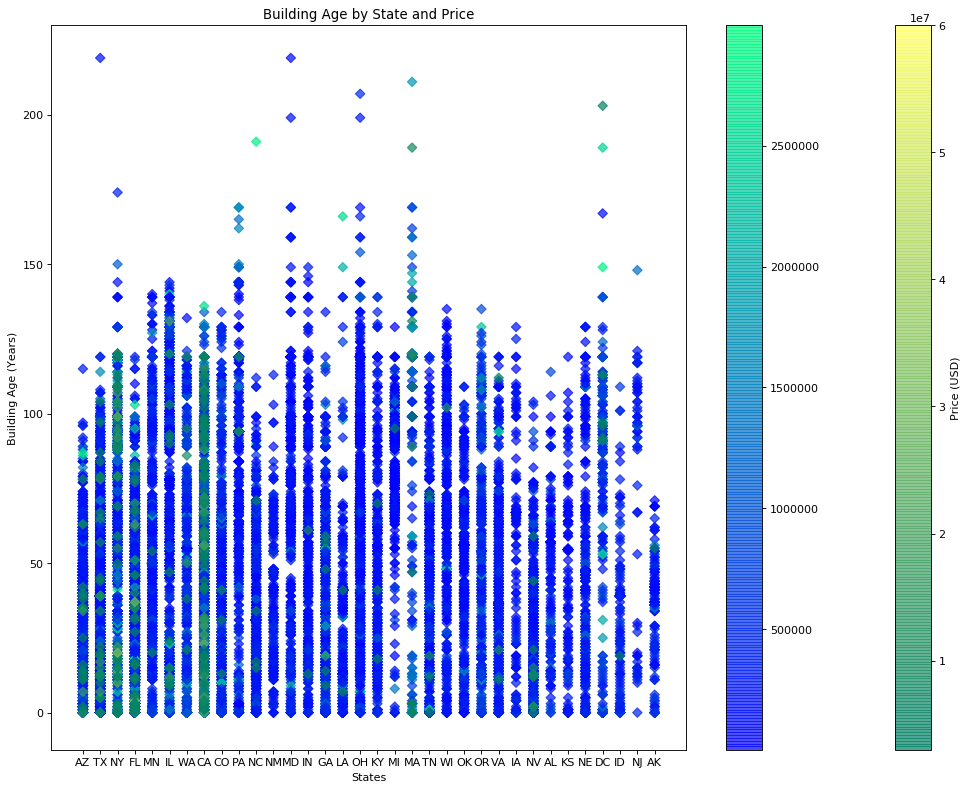

In [204]:
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='y')

price_building1 = plt.scatter(df['State'][df.Price < 3000000], df['Building_Age'][df.Price < 3000000], c=df['Price'][df.Price < 3000000], cmap='winter', alpha=0.7, marker='D')
price_building2 = plt.scatter(df['State'][df.Price >= 3000000], df['Building_Age'][df.Price >= 3000000], c=df['Price'][df.Price >= 3000000], cmap='summer', alpha=0.7, marker='D')
plt.xlabel('States')
plt.ylabel('Building Age (Years)')
plt.title('Building Age by State and Price')
plt.colorbar(price_building2, label="Price (USD)")
plt.colorbar(price_building1)
plt.show()

In [165]:
df['Price'].groupby(df['State']).sum()

State
AK    6.273977e+07
AL    6.462515e+07
AZ    1.008103e+09
CA    3.247292e+09
CO    5.102637e+08
DC    1.997780e+08
FL    1.549947e+09
GA    4.476981e+08
IA    3.571247e+07
ID    6.771077e+07
IL    5.050855e+08
IN    1.333701e+08
KS    3.661077e+07
KY    1.406446e+08
LA    1.815269e+08
MA    2.783558e+08
MD    1.568108e+08
MI    6.039307e+07
MN    3.004141e+08
NC    3.880290e+08
NE    1.093800e+08
NJ    2.292762e+07
NM    7.373264e+07
NV    6.799697e+08
NY    1.506191e+09
OH    3.484297e+08
OK    1.395261e+08
OR    2.423474e+08
PA    3.190721e+08
TN    2.569094e+08
TX    2.063312e+09
VA    2.427115e+08
WA    3.568489e+08
WI    1.110093e+08
Name: Price, dtype: float64

In [166]:
price_by_state = df['Price'].groupby(df['State']).sum()

In [167]:
price_by_stateDFs = pd.DataFrame(price_by_state)

In [169]:
price_by_stateDFs['avg'] = price_by_stateDFs['Price'] / df['Price'].groupby(df['State']).count()

In [170]:
price_by_stateDFs

Price           avg
State                            
AK     6.273977e+07  3.524706e+05
AL     6.462515e+07  3.247495e+05
AZ     1.008103e+09  5.196408e+05
CA     3.247292e+09  1.193419e+06
CO     5.102637e+08  4.939630e+05
DC     1.997780e+08  8.800794e+05
FL     1.549947e+09  5.696241e+05
GA     4.476981e+08  5.199746e+05
IA     3.571247e+07  2.190949e+05
ID     6.771077e+07  4.128706e+05
IL     5.050855e+08  5.122571e+05
IN     1.333701e+08  2.352207e+05
KS     3.661077e+07  2.179212e+05
KY     1.406446e+08  2.998819e+05
LA     1.815269e+08  3.524794e+05
MA     2.783558e+08  1.237137e+06
MD     1.568108e+08  2.379527e+05
MI     6.039307e+07  1.290450e+05
MN     3.004141e+08  3.846531e+05
NC     3.880290e+08  3.834279e+05
NE     1.093800e+08  2.819071e+05
NJ     2.292762e+07  3.639304e+05
NM     7.373264e+07  2.401715e+05
NV     6.799697e+08  4.512075e+05
NY     1.506191e+09  1.261467e+06
OH     3.484297e+08  2.483462e+05
OK     1.395261e+08  2.678044e+05
OR     2.423474e+08  5.609893e+05
PA     3.190721e+08  3.168541e+05
TN     2.569094e+08  4.084409e+05
TX     2.063312e+09  4.211701e+05
VA     2.427115e+08  3.622559e+05
WA     3.568489e+08  6.810094e+05
WI     1.110093e+08  2.740970e+05

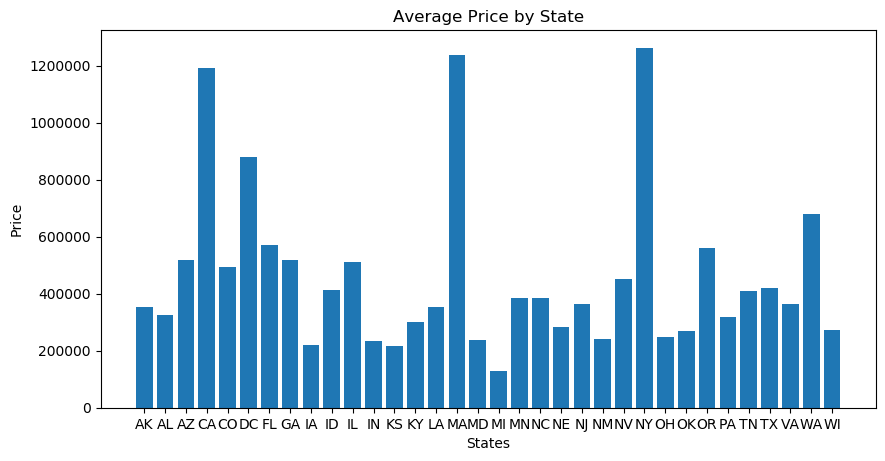

In [172]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='y')

plt.bar(price_by_stateDFs.index, price_by_stateDFs['avg'])
plt.xlabel('States')
plt.ylabel('Price')
plt.title('Average Price by State')
plt.show()

In [155]:
df['Days_On_Trulia'].groupby(df['State']).sum()

State
AK     17135.460674
AL      9773.778894
AZ    138842.459278
CA    165940.518559
CO     58127.769603
DC     10661.762115
FL    190571.564131
GA     66270.980256
IA     12148.619632
ID     10203.414634
IL     58105.590264
IN     32816.952381
KS     13306.142857
KY     29385.074627
LA     48049.388350
MA     11566.800000
MD     43515.682853
MI     28432.083333
MN     40417.014085
NC     72927.146245
NE     29369.512887
NJ      4111.111111
NM     23323.143322
NV    111062.233577
NY     23946.820771
OH     89435.736992
OK     39597.888676
OR     30735.833333
PA     67933.147964
TN     39348.019078
TX    353237.321494
VA     45810.895522
WA     29693.015267
WI     22201.111111
Name: Days_On_Trulia, dtype: float64

In [156]:
days_by_state3 = df['Days_On_Trulia'].groupby(df['State']).sum()

In [157]:
days_by_stateDFs = pd.DataFrame(days_by_state3)

In [161]:
days_by_stateDFs['avg'] = days_by_stateDFs['Days_On_Trulia'] / df['Days_On_Trulia'].groupby(df['State']).count()

In [162]:
days_by_stateDFs

Days_On_Trulia        avg
State                           
AK       17135.460674  96.266633
AL        9773.778894  49.114467
AZ      138842.459278  71.568278
CA      165940.518559  60.985123
CO       58127.769603  56.270832
DC       10661.762115  46.968115
FL      190571.564131  70.037326
GA       66270.980256  76.969780
IA       12148.619632  74.531409
ID       10203.414634  62.215943
IL       58105.590264  58.930619
IN       32816.952381  57.878223
KS       13306.142857  79.203231
KY       29385.074627  62.654743
LA       48049.388350  93.299783
MA       11566.800000  51.408000
MD       43515.682853  66.032903
MI       28432.083333  60.752315
MN       40417.014085  51.750338
NC       72927.146245  72.062397
NE       29369.512887  75.694621
NJ        4111.111111  65.255732
NM       23323.143322  75.971151
NV      111062.233577  73.697567
NY       23946.820771  20.055964
OH       89435.736992  63.746071
OK       39597.888676  76.003625
OR       30735.833333  71.147762
PA       67933.147964  67.460922
TN       39348.019078  62.556469
TX      353237.321494  72.103964
VA       45810.895522  68.374471
WA       29693.015267  56.666060
WI       22201.111111  54.817558

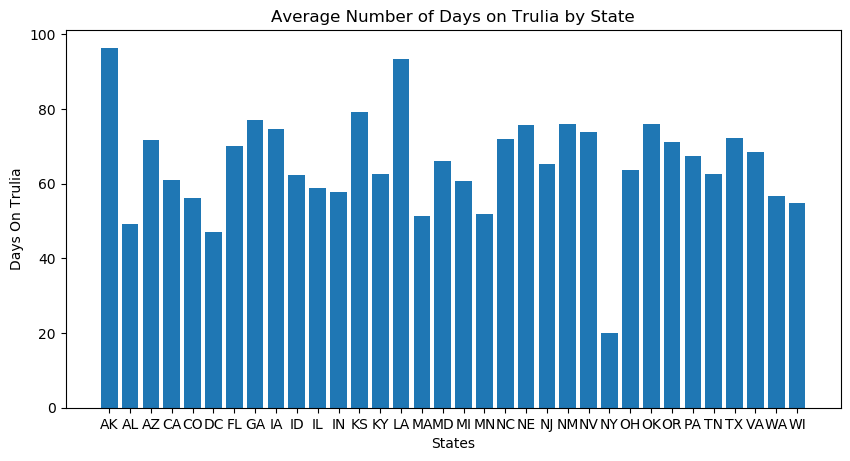

In [171]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='y')

plt.bar(days_by_stateDFs.index, days_by_stateDFs['avg'])
plt.xlabel('States')
plt.ylabel('Days On Trulia')
plt.title('Average Number of Days on Trulia by State')
plt.show()

In [110]:
df

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

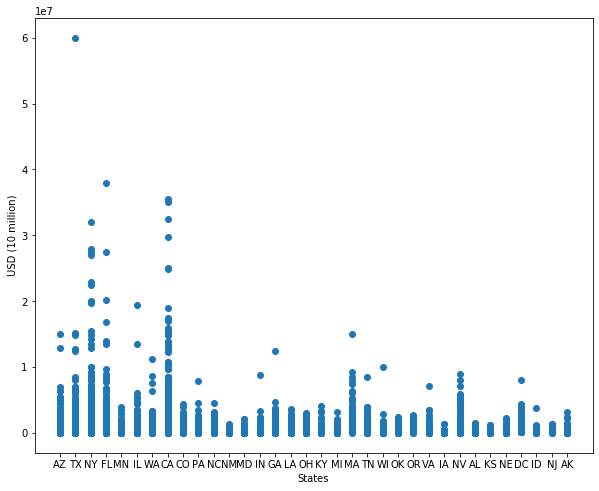

In [42]:
figure(figsize=(10,8))
plt.scatter(df['State'], df['Price'])
plt.xlabel('States')
plt.ylabel('USD (10 million)')
plt.show()

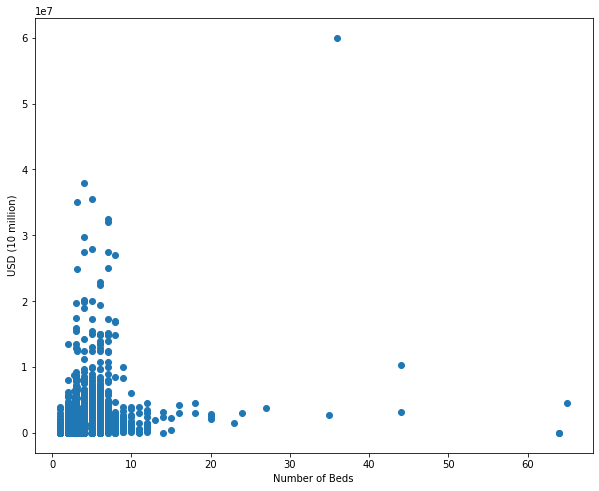

In [43]:
figure(figsize=(10,8))
plt.scatter(df['Beds'], df['Price'])
plt.xlabel('Number of Beds')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.05629496292229397
Train Score 0.052406154405487904


<function matplotlib.pyplot.show(*args, **kw)>

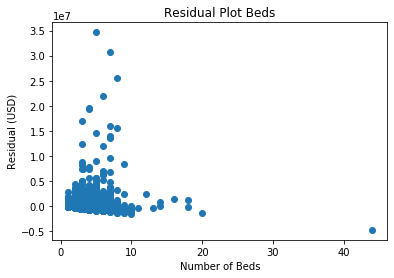

In [44]:
beds = ['Beds']
target = ['Price']
linregs = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[beds], df[target], test_size=0.25, random_state=0)
linregs.fit(X_train, y_train)
random.seed(0)
pred_price = linregs.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregs.score(X_test, y_test))
print("Train Score", linregs.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Residual (USD)")
plt.show

Comparing the Residual plot for Beds x Price there is an indication of a negative linear relationshi with some outliers. 

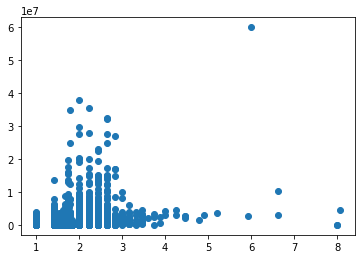

In [45]:
Sqrt_Beds = np.sqrt(df['Beds'])
plt.scatter(Sqrt_Beds, df['Price'])
plt.show()
#No visible changes in data shape applying square root transformation

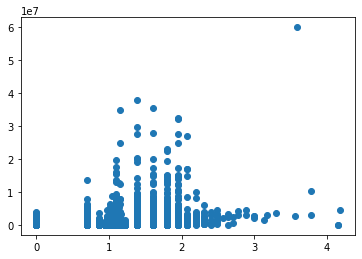

In [46]:
Log_Beds = np.log(df['Beds'])
plt.scatter(Log_Beds, df['Price'])
plt.show()
#No visible changes in data/pattern by applying square root transformation

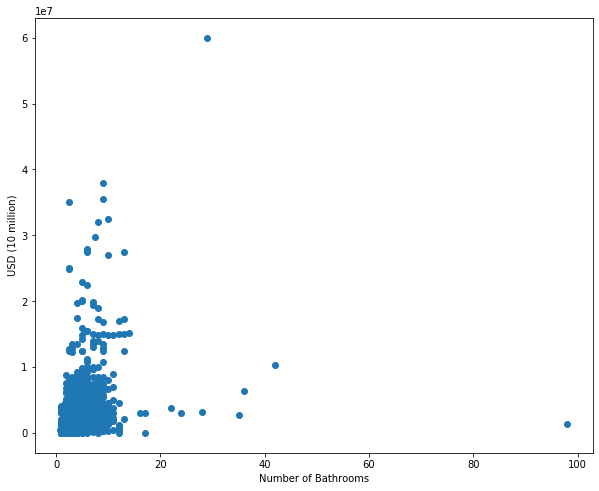

In [47]:
figure(figsize=(10,8))
plt.scatter(df['Bath'], df['Price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.18991336383879664
Train Score 0.14846597739970024


<function matplotlib.pyplot.show(*args, **kw)>

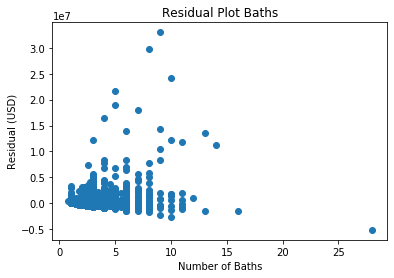

In [48]:
bath = ['Bath']
target = ['Price']
linregsb = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[bath], df[target], test_size=0.25, random_state=0)
linregsb.fit(X_train, y_train)
random.seed(0)
pred_price = linregsb.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsb.score(X_test, y_test))
print("Train Score", linregsb.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Baths")
plt.xlabel("Number of Baths")
plt.ylabel("Residual (USD)")
plt.show

Comparing the number of bathrooms vs price for the residual plot shows that there is a negative linear regression pattern with spread out outliers.

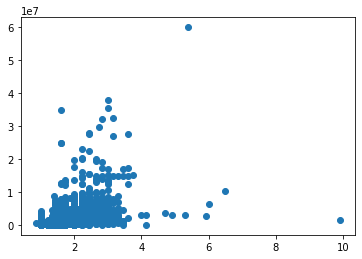

In [49]:
Sqrt_Bath = np.sqrt(df['Bath'])
plt.scatter(Sqrt_Bath, df['Price'])
plt.show()
#applying Square Root transformation shows something like a normal distribution

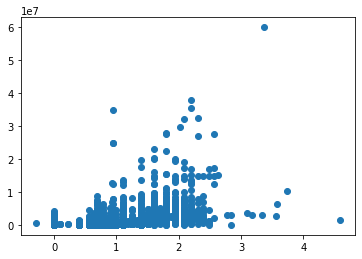

In [50]:
Log_Bath = np.log(df['Bath'])
plt.scatter(Log_Bath, df['Price'])
plt.show()
#applying log transformation shows a shape close to a bimodal distribution but its ambigious

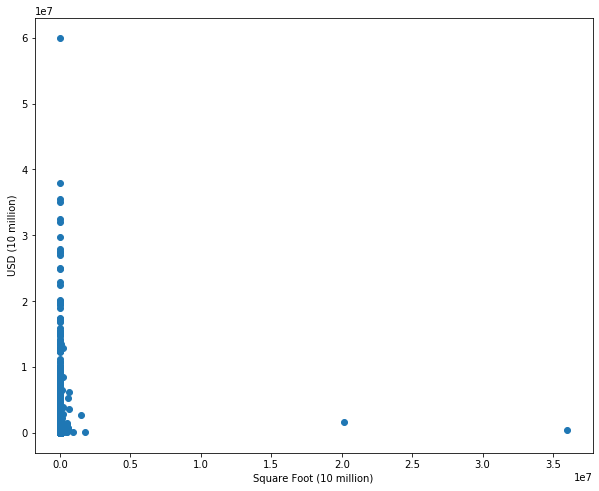

In [51]:
figure(figsize=(10,8))
plt.scatter(df['Sqr_Ft'], df['Price'])
plt.xlabel('Square Foot (10 million)')
plt.ylabel('USD (10 million)')
plt.show()

Test Score -4.963965650128799e-05
Train Score 5.269799832596788e-05


<function matplotlib.pyplot.show(*args, **kw)>

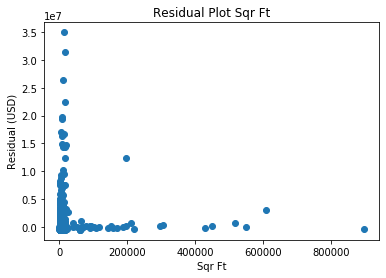

In [52]:
sqr_ft = ['Sqr_Ft']
target = ['Price']
linregsS = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[sqr_ft], df[target], test_size=0.25, random_state=0)
linregsS.fit(X_train, y_train)
random.seed(0)
pred_price = linregsS.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsS.score(X_test, y_test))
print("Train Score", linregsS.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Sqr Ft")
plt.xlabel("Sqr Ft")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Sqr Ft vs Price, shows that there isn't an discernable pattern here

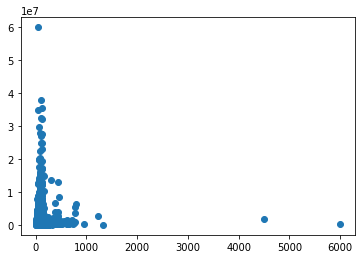

In [53]:
Sqrt_SqrFt = np.sqrt(df['Sqr_Ft'])
plt.scatter(Sqrt_SqrFt, df['Price'])
plt.show()
#Applying square rt tranformation does not reveal any new patterns

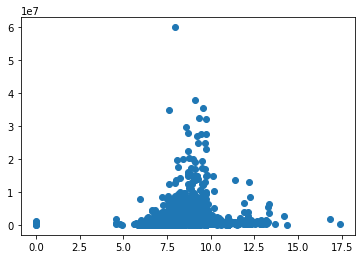

In [54]:
Log_SqrFt = np.log(df['Sqr_Ft'])
plt.scatter(Log_SqrFt, df['Price'])
plt.show()

#Applying a log transfromation does reveal a normal distribution shape to our datset for Sqr Ft, something to keep in mind

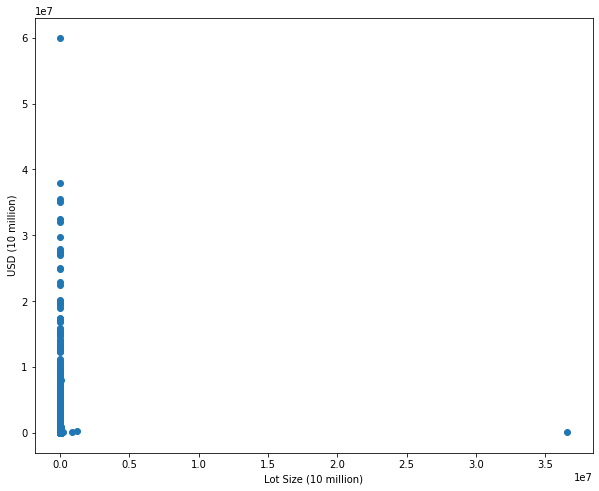

In [55]:
figure(figsize=(10,8))
plt.scatter(df['Lot_Size'], df['Price'])
plt.xlabel('Lot Size (10 million)')
plt.ylabel('USD (10 million)')
plt.show()

Test Score -0.0001029462405082171
Train Score 1.2949110508198025e-05


<function matplotlib.pyplot.show(*args, **kw)>

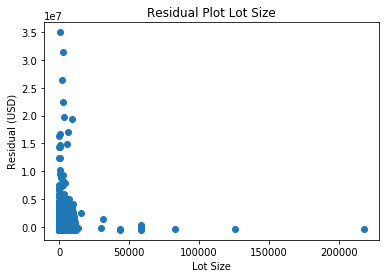

In [56]:
lot_size = ['Lot_Size']
target = ['Price']
linregsl = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[lot_size], df[target], test_size=0.25, random_state=0)
linregsl.fit(X_train, y_train)
random.seed(0)
pred_price = linregsl.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsl.score(X_test, y_test))
print("Train Score", linregsl.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Lot Size")
plt.xlabel("Lot Size")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Lot Size vs Price, shows that there isn't an discernable linear regression pattern here


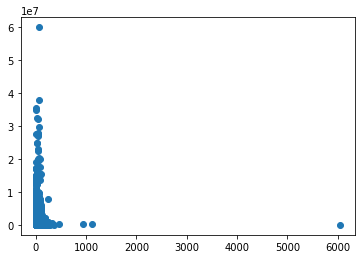

In [57]:
Sqrt_Lot_Size = np.sqrt(df['Lot_Size'])
plt.scatter(Sqrt_Lot_Size, df['Price'])
plt.show()
#No discernable new patterns from sqrt

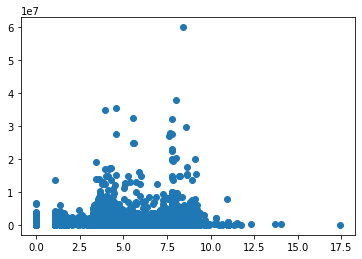

In [58]:
Log_Lot_Size = np.log(df['Lot_Size'])
plt.scatter(Log_Lot_Size, df['Price'])
plt.show()
#applying log reveals a pattern resembling a bidomal distribution

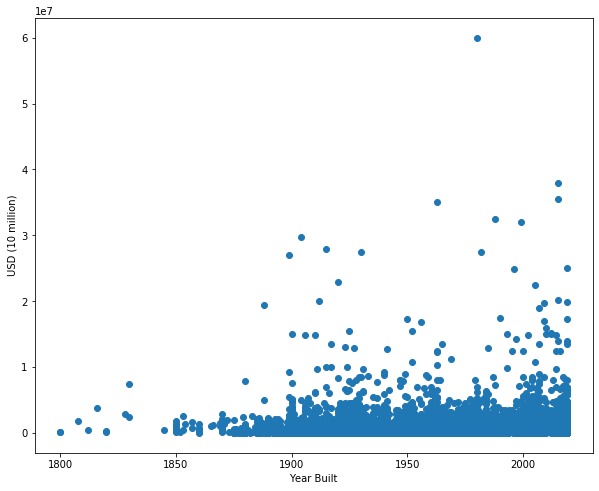

In [59]:
figure(figsize=(10,8))
plt.scatter(df['Year_Built'], df['Price'])
plt.xlabel('Year Built')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.00015164890967156452
Train Score 0.0002046858702369203


<function matplotlib.pyplot.show(*args, **kw)>

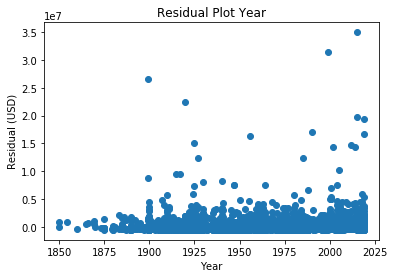

In [60]:
year = ['Year_Built']
target = ['Price']
linregsy = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[year], df[target], test_size=0.25, random_state=0)
linregsy.fit(X_train, y_train)
random.seed(0)
pred_price = linregsy.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsy.score(X_test, y_test))
print("Train Score", linregsy.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Year")
plt.xlabel("Year")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Year Built vs Price, shows that there isn't an discernable linear regression pattern here


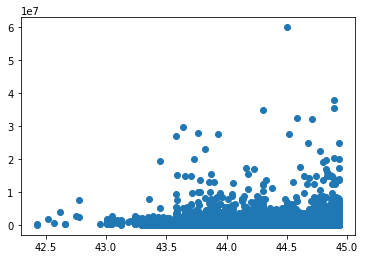

In [61]:
df['Sqrt_YearB'] = np.sqrt(df['Year_Built'])
plt.scatter(df['Sqrt_YearB'], df['Price'])
plt.show()
#no new pattern with sqrt transformation

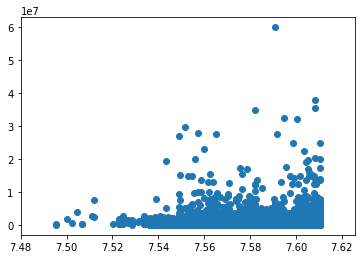

In [62]:
df['Log_YearB'] = np.log(df['Year_Built'])
plt.scatter(df['Log_YearB'], df['Price'])
plt.show()
#No new pattern here

In [63]:
df['Building_Age'] = max(df['Year_Built']) - df['Year_Built']

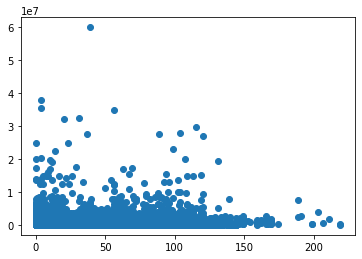

In [64]:
df['Building_Age']

plt.scatter(df['Building_Age'], df['Price'])
plt.show()

#Converted our Year Built Time Series to the interger of Age of the Buildings

Test Score 0.00015164890967156452
Train Score 0.0002046858702369203


<function matplotlib.pyplot.show(*args, **kw)>

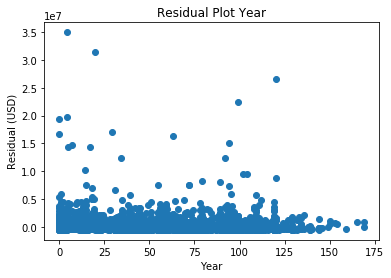

In [65]:
year = ['Building_Age']
target = ['Price']
linregsy = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[year], df[target], test_size=0.25, random_state=0)
linregsy.fit(X_train, y_train)
random.seed(0)
pred_price = linregsy.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsy.score(X_test, y_test))
print("Train Score", linregsy.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Year")
plt.xlabel("Year")
plt.ylabel("Residual (USD)")
plt.show

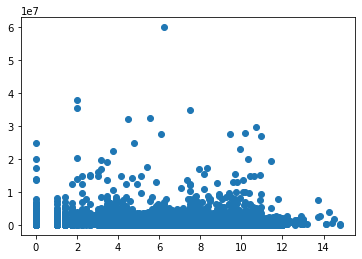

In [66]:
df['Building_Age2'] = np.sqrt(df['Building_Age'])
plt.scatter(df['Building_Age2'], df['Price'])
plt.show()

C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


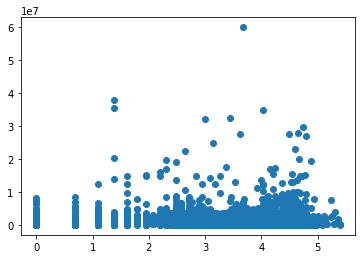

In [67]:
df['Building_Age3'] = np.log(df['Building_Age'])
plt.scatter(df['Building_Age3'], df['Price'])
plt.show()

#applying log and sqrt here does not reveal and new patterns. 

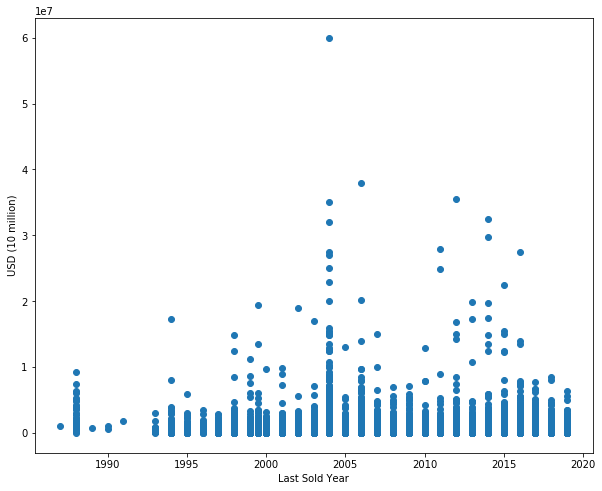

In [68]:
figure(figsize=(10,8))
plt.scatter(df['Last_Sold_Year'], df['Price'])
plt.xlabel('Last Sold Year')
plt.ylabel('USD (10 million)')
plt.show()

Test Score -9.794897184844942e-05
Train Score 6.6444701773971104e-06


<function matplotlib.pyplot.show(*args, **kw)>

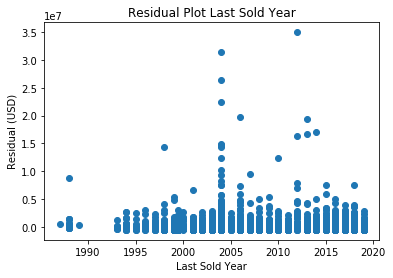

In [69]:
last_y = ['Last_Sold_Year']
target = ['Price']
linregsly = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[last_y], df[target], test_size=0.25, random_state=0)
linregsly.fit(X_train, y_train)
random.seed(0)
pred_price = linregsly.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsly.score(X_test, y_test))
print("Train Score", linregsly.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Last Sold Year")
plt.xlabel("Last Sold Year")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Last Sold Year vs Price, shows that there isn't an discernable linear regression pattern here


In [70]:
df['Time_Since_LS'] = max(df['Last_Sold_Year']) - df['Last_Sold_Year']

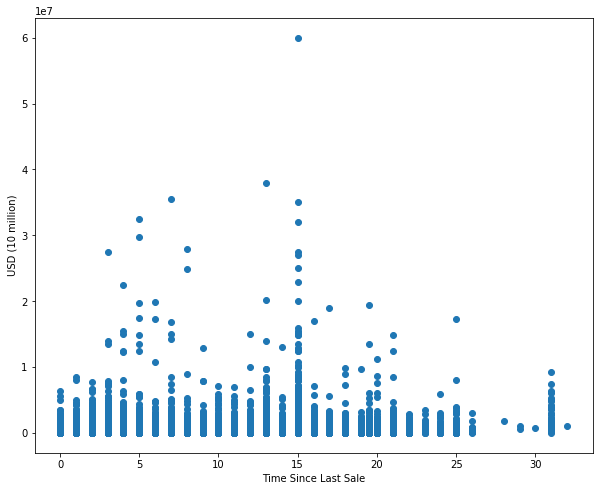

In [71]:
figure(figsize=(10,8))
plt.scatter(df['Time_Since_LS'], df['Price'])
plt.xlabel('Time Since Last Sale')
plt.ylabel('USD (10 million)')
plt.show()

Test Score -9.794897184844942e-05
Train Score 6.644470177508133e-06


<function matplotlib.pyplot.show(*args, **kw)>

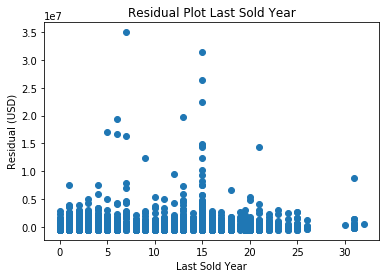

In [72]:
last_y = ['Time_Since_LS']
target = ['Price']
linregsly = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[last_y], df[target], test_size=0.25, random_state=0)
linregsly.fit(X_train, y_train)
random.seed(0)
pred_price = linregsly.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsly.score(X_test, y_test))
print("Train Score", linregsly.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Last Sold Year")
plt.xlabel("Last Sold Year")
plt.ylabel("Residual (USD)")
plt.show

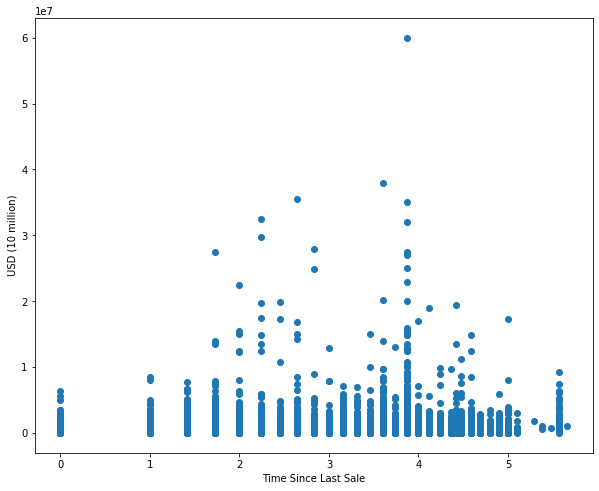

In [73]:
figure(figsize=(10,8))
df['TSLS'] = np.sqrt(df['Time_Since_LS'])
plt.scatter(df['TSLS'], df['Price'])
plt.xlabel('Time Since Last Sale')
plt.ylabel('USD (10 million)')
plt.show()

C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


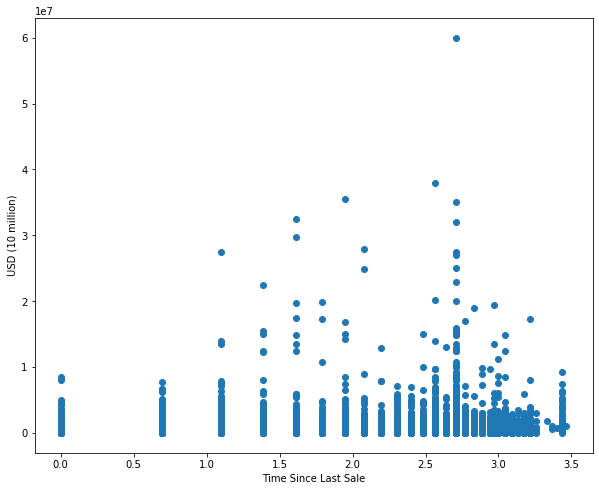

In [74]:
figure(figsize=(10,8))
df['Log_TSLA'] = np.log(df['Time_Since_LS'])
plt.scatter(df['Log_TSLA'], df['Price'])
plt.xlabel('Time Since Last Sale')
plt.ylabel('USD (10 million)')
plt.show()
#No difference in pattern for after data transformation for Time Since Last Sale

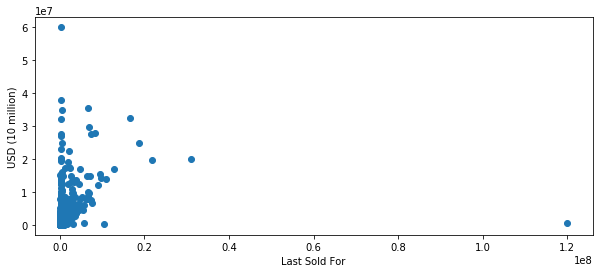

In [75]:
figure(figsize=(10,4))
plt.scatter(df['Last_Sold_For'], df['Price'])
plt.xlabel('Last Sold For')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.11385444303351389
Train Score 0.06494747911313226


<function matplotlib.pyplot.show(*args, **kw)>

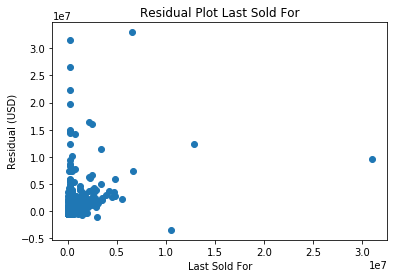

In [76]:
lsf = ['Last_Sold_For']
target = ['Price']
linregslsf = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[lsf], df[target], test_size=0.25, random_state=0)
linregslsf.fit(X_train, y_train)
random.seed(0)
pred_price = linregslsf.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregslsf.score(X_test, y_test))
print("Train Score", linregslsf.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Last Sold For")
plt.xlabel("Last Sold For")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Last Sold For vs Price, shows that there isn't an discernable linear regression pattern here


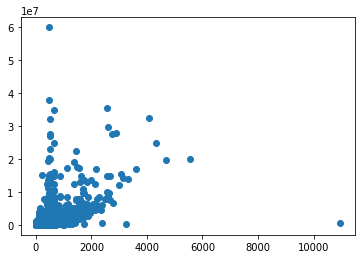

In [77]:
df['Sqrt_LastS'] = np.sqrt(df['Last_Sold_For'])
plt.scatter(df['Sqrt_LastS'], df['Price'])
plt.show()

#No new pattern here

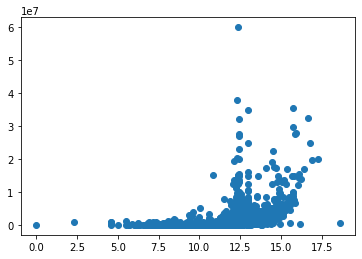

In [78]:
df['Log_LastS'] = np.log(df['Last_Sold_For'])
plt.scatter(df['Log_LastS'], df['Price'])
plt.show()
#Interesting change here. Applying Log shows that there may be a positive linear relationship between last sold for and 
#current price

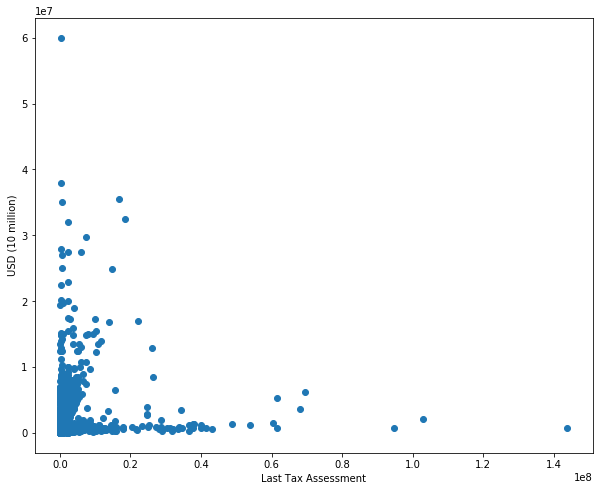

In [79]:
figure(figsize=(10,8))
plt.scatter(df['Last_Tax_Assessment'], df['Price'])
plt.xlabel('Last Tax Assessment')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.04043373250710114
Train Score 0.025778197907940226


<function matplotlib.pyplot.show(*args, **kw)>

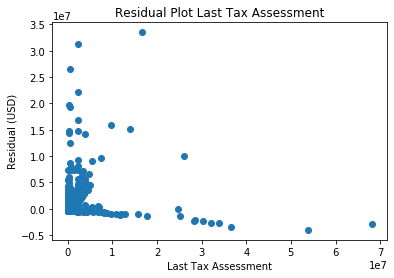

In [80]:
lta = ['Last_Tax_Assessment']
target = ['Price']
linregslta = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[lta], df[target], test_size=0.25, random_state=0)
linregslta.fit(X_train, y_train)
random.seed(0)
pred_price = linregslta.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregslta.score(X_test, y_test))
print("Train Score", linregslta.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Last Tax Assessment")
plt.xlabel("Last Tax Assessment")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Last Tax Assessment vs Price, shows that there isn't an discernable linear regression pattern here


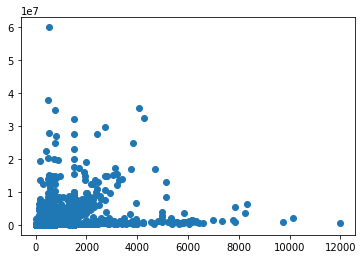

In [81]:
df['Sqrt_LastT'] = np.sqrt(df['Last_Tax_Assessment'])
plt.scatter(df['Sqrt_LastT'], df['Price'])
plt.show()

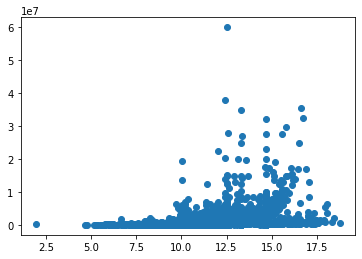

In [82]:
df['Log_LastT'] = np.log(df['Last_Tax_Assessment'])
plt.scatter(df['Log_LastT'], df['Price'])
plt.show()
#Applying log transformation seems to hint at a possible linear relationship between Last Tax Assessment and current Price

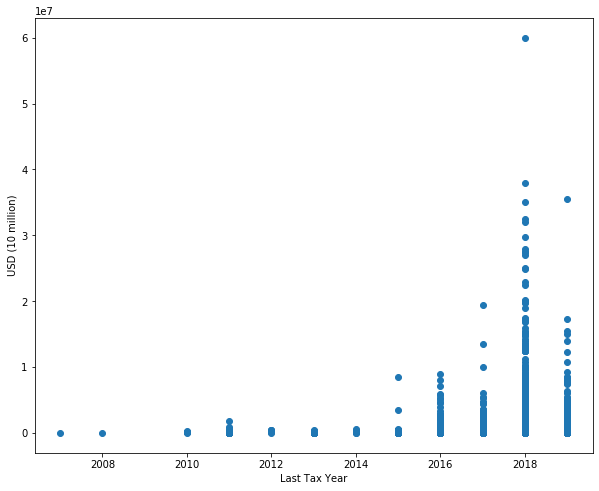

In [83]:
figure(figsize=(10,8))
plt.scatter(df['Last_Tax_Year'], df['Price'])
plt.xlabel('Last Tax Year')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.0014272094761890175
Train Score 0.00099373388260382


<function matplotlib.pyplot.show(*args, **kw)>

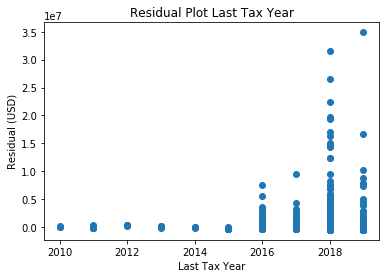

In [84]:
lty = ['Last_Tax_Year']
target = ['Price']
linregslty = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[lty], df[target], test_size=0.25, random_state=0)
linregslty.fit(X_train, y_train)
random.seed(0)
pred_price = linregslty.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregslty.score(X_test, y_test))
print("Train Score", linregslty.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Last Tax Year")
plt.xlabel("Last Tax Year")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Last Tax Year vs Price, shows that there isn't an discernable linear regression pattern here


In [85]:
df['Year_Since_LT'] = max(df['Last_Tax_Year']) - df['Last_Tax_Year']

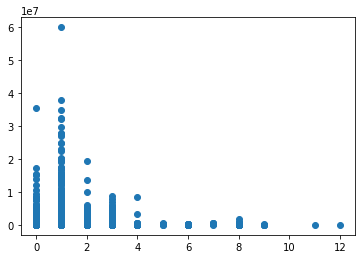

In [86]:
plt.scatter(df['Year_Since_LT'], df['Price'])
plt.show()

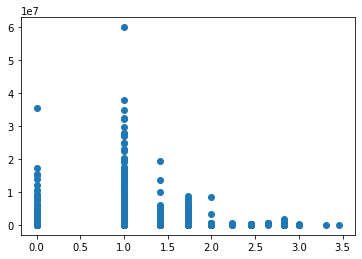

In [87]:
Sqrt_YSLT = np.sqrt(df['Year_Since_LT'])
plt.scatter(Sqrt_YSLT, df['Price'])
plt.show()

C:\Users\Jun\Anaconda3\envs\TestEnv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


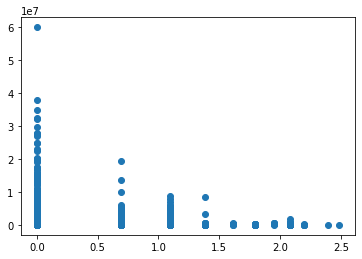

In [88]:
Log_YSLT = np.log(df['Year_Since_LT'])
plt.scatter(Log_YSLT, df['Price'])
plt.show()

Test Score 0.0014272094761890175
Train Score 0.000993733882604042


<function matplotlib.pyplot.show(*args, **kw)>

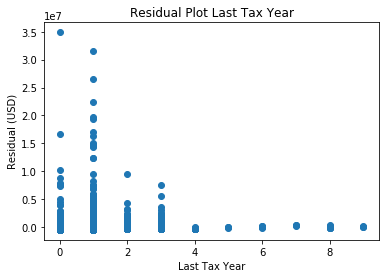

In [89]:
lty = ['Year_Since_LT']
target = ['Price']
linregslty = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[lty], df[target], test_size=0.25, random_state=0)
linregslty.fit(X_train, y_train)
random.seed(0)
pred_price = linregslty.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregslty.score(X_test, y_test))
print("Train Score", linregslty.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Last Tax Year")
plt.xlabel("Last Tax Year")
plt.ylabel("Residual (USD)")
plt.show

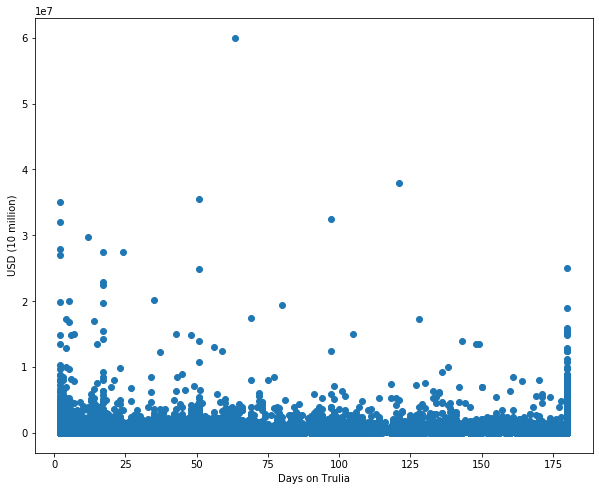

In [90]:
figure(figsize=(10,8))
plt.scatter(df['Days_On_Trulia'], df['Price'])
plt.xlabel('Days on Trulia')
plt.ylabel('USD (10 million)')
plt.show()

Test Score 0.0001996148203033954
Train Score 0.0011368256569586066


<function matplotlib.pyplot.show(*args, **kw)>

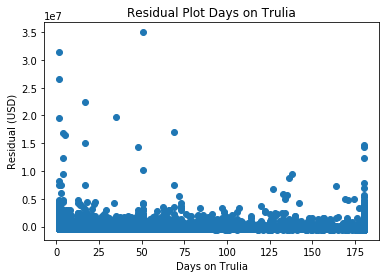

In [91]:
dot = ['Days_On_Trulia']
target = ['Price']
linregsdot = LinearRegression()

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[dot], df[target], test_size=0.25, random_state=0)
linregsdot.fit(X_train, y_train)
random.seed(0)
pred_price = linregsdot.predict(X_test)
resid = y_test - pred_price

print("Test Score", linregsdot.score(X_test, y_test))
print("Train Score", linregsdot.score(X_train, y_train))

plt.scatter(X_test, resid)
plt.title("Residual Plot Days on Trulia")
plt.xlabel("Days on Trulia")
plt.ylabel("Residual (USD)")
plt.show

Comparing the residual plot for Days on Trulia vs Price, shows that there isn't an discernable linear regression pattern here


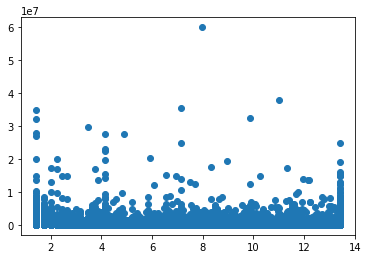

In [92]:
Sqrt_DOT = np.sqrt(df['Days_On_Trulia'])
plt.scatter(Sqrt_DOT, df['Price'])
plt.show()
#Sqrt Transformation doesn't reveal new patterns

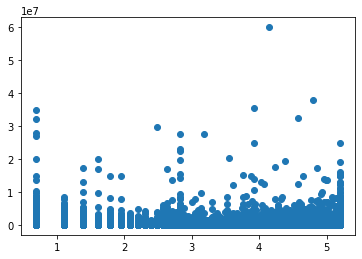

In [93]:
Log_DOT = np.log(df['Days_On_Trulia'])
plt.scatter(Log_DOT, df['Price'])
plt.show()
#Log transformation does not offer any new insights

In [94]:
df.describe(include='all')

Crawl Timestamp                                Title  \
count                       30006                                30006   
unique                      27461                                29964   
top     2019-09-19 23:01:29 +0000   17850 N 68th St Phoenix, AZ 85054    
freq                            4                                    4   
mean                          NaN                                  NaN   
std                           NaN                                  NaN   
min                           NaN                                  NaN   
25%                           NaN                                  NaN   
50%                           NaN                                  NaN   
75%                           NaN                                  NaN   
max                           NaN                                  NaN   

                                              Description         Price  \
count                                               30006  3.000600e+04   
unique                                              29459           NaN   
top     This property is no longer available to rent o...           NaN   
freq                                                   23           NaN   
mean                                                  NaN  5.281437e+05   
std                                                   NaN  1.137053e+06   
min                                                   NaN  1.000000e+00   
25%                                                   NaN  1.874000e+05   
50%                                                   NaN  3.099000e+05   
75%                                                   NaN  5.299000e+05   
max                                                   NaN  6.000000e+07   

           Longitude      Latitude          Beds          Bath  \
count   30006.000000  30006.000000  30006.000000  30006.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean      -95.167341     36.158007      3.257064      2.554607   
std        15.454027      5.500075      1.412875      1.391582   
min      -150.047160     25.550295      1.000000      0.750000   
25%      -106.742751     32.747084      2.937523      2.000000   
50%       -93.390977     36.016481      3.000000      2.000000   
75%       -81.638904     40.017658      4.000000      3.000000   
max       -70.997740     61.442024     65.000000     98.000000   

                                                 Features  \
count                                               30006   
unique                                              29959   
top     Single Family Home | $99/sqft | 180+ Days on T...   
freq                                                    4   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    Address     City  State       Zipcode  \
count                                 30006    30006  30006  30006.000000   
unique                                29964      676     34           NaN   
top      17850 N 68th St Phoenix, AZ 85054   Houston     TX           NaN   
freq                                      4     1077   4899           NaN   
mean                                    NaN      NaN    NaN  59343.334700   
std                                     NaN      NaN    NaN  27211.241581   
min                                     NaN      NaN    NaN      0.000000   
25%                                     NaN      NaN    NaN  33137.000000   
50%      

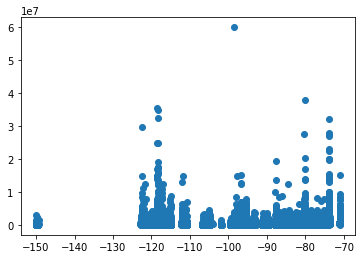

In [95]:
plt.scatter(df['Longitude'], df['Price'])
plt.show()

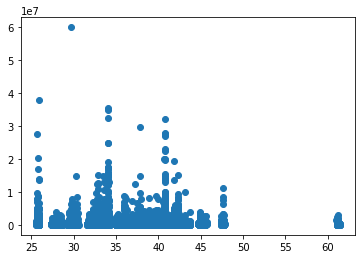

In [96]:
plt.scatter(df['Latitude'], df['Price'])
plt.show()

In [97]:
df[df['Price'].isnull()]

Empty DataFrame
Columns: [Crawl Timestamp, Title, Description, Price, Longitude, Latitude, Beds, Bath, Features, Address, City, State, Zipcode, Address Full, Facts, Sqr_Ft, Lot_Size, Year_Built, Price_Sqr_Ft, Last_Sold_Year, Last_Sold_For, Last_Tax_Assessment, Last_Tax_Year, Days_On_Trulia, Beds_isnull, Bath_isnull, Sqr_Ft_isnull, Lot_Size_isnull, Year_Built_isnull, Price_Sqr_Ft_isnull, Last_Sold_Year_isnull, Last_Sold_For_isnull, Last_Tax_Assessment_isnull, Last_Tax_Year_isnull, Days_On_Trulia_isnull, Sqrt_YearB, Log_YearB, Building_Age, Building_Age2, Building_Age3, Time_Since_LS, TSLS, Log_TSLA, Sqrt_LastS, Log_LastS, Sqrt_LastT, Log_LastT, Year_Since_LT]
Index: []

In [98]:
df.isnull().sum()

Crawl Timestamp               0
Title                         0
Description                   0
Price                         0
Longitude                     0
Latitude                      0
Beds                          0
Bath                          0
Features                      0
Address                       0
City                          0
State                         0
Zipcode                       0
Address Full                  0
Facts                         0
Sqr_Ft                        0
Lot_Size                      0
Year_Built                    0
Price_Sqr_Ft                  0
Last_Sold_Year                0
Last_Sold_For                 0
Last_Tax_Assessment           0
Last_Tax_Year                 0
Days_On_Trulia                0
Beds_isnull                   0
Bath_isnull                   0
Sqr_Ft_isnull                 0
Lot_Size_isnull               0
Year_Built_isnull             0
Price_Sqr_Ft_isnull           0
Last_Sold_Year_isnull         0
Last_Sol

**Using pd.get_dummies here, we will generate dummy variables for our States column, converting this catagorical variable to numerical data which can be used as part of our analysis**

In [99]:
state_dummies = pd.get_dummies(df['State'])
state_dummies

AK  AL  AZ  CA  CO  DC  FL  GA  IA  ID  IL  IN  KS  KY  LA  MA  MD  MI  \
0       0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
30001   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
30002   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30003   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
30004   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30005   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       MN  NC  NE  NJ  NM  NV  NY  OH  OK  OR  PA  TN  TX  VA  WA  WI  
0       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
1       0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0  
2       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0  
3       0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0  
4       0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
30001   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
30002   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
30003   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  
30004   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0  
30005   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

[30006 rows x 34 columns]

In [100]:
df = pd.concat([df, state_dummies], axis=1)
df

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [101]:
df.isnull().sum()

Crawl Timestamp               0
Title                         0
Description                   0
Price                         0
Longitude                     0
Latitude                      0
Beds                          0
Bath                          0
Features                      0
Address                       0
City                          0
State                         0
Zipcode                       0
Address Full                  0
Facts                         0
Sqr_Ft                        0
Lot_Size                      0
Year_Built                    0
Price_Sqr_Ft                  0
Last_Sold_Year                0
Last_Sold_For                 0
Last_Tax_Assessment           0
Last_Tax_Year                 0
Days_On_Trulia                0
Beds_isnull                   0
Bath_isnull                   0
Sqr_Ft_isnull                 0
Lot_Size_isnull               0
Year_Built_isnull             0
Price_Sqr_Ft_isnull           0
Last_Sold_Year_isnull         0
Last_Sol

In [102]:

df_X = df.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


**As part of my model, I'm planning to implement NLP data from the dataframe to my regression model. As such, I'm using the SpaCy library to assist me. One of the key factors in using the SpaCy model, is the size of the library I will use. They are separated into sm, md and lg models, and to ensure that my model runs at maximum efficiency I will test them all individually. To do this, I will convert the respective columns (Title, Description, Facts, Features) to numerical data using each of the models (sm, md, lg) and then I will concat them with my main dataframe and run regression. The models that score the highest, will then be concated all together to create a final dataframe to complete my regression models**

In [253]:
#[Title, Description, Address Full, Facts]
df_titlesm = df.copy()
df_titlemd = df.copy()
df_titlelg = df.copy()
df_descsm = df.copy()
df_descmd = df.copy()
df_desclg = df.copy()
df_factsm = df.copy()
df_factmd = df.copy()
df_factlg = df.copy()

In [254]:

nlp = spacy.load("en_core_web_sm")

vector_list = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Title'])
    vector = doc.vector
    vector_list.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Title' + str(x)
    return  x
df_title = pd.DataFrame(vector_list, index=df.index)
df_title = df_title.rename(columns=rename_title)
df_titlesm = pd.concat([df_titlesm, df_title], axis=1)


In [255]:
df_titlesm

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [256]:
df_title_sm = df_titlesm.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [257]:
df.isnull().sum()

Crawl Timestamp               0
Title                         0
Description                   0
Price                         0
Longitude                     0
Latitude                      0
Beds                          0
Bath                          0
Features                      0
Address                       0
City                          0
State                         0
Zipcode                       0
Address Full                  0
Facts                         0
Sqr_Ft                        0
Lot_Size                      0
Year_Built                    0
Price_Sqr_Ft                  0
Last_Sold_Year                0
Last_Sold_For                 0
Last_Tax_Assessment           0
Last_Tax_Year                 0
Days_On_Trulia                0
Beds_isnull                   0
Bath_isnull                   0
Sqr_Ft_isnull                 0
Lot_Size_isnull               0
Year_Built_isnull             0
Price_Sqr_Ft_isnull           0
Last_Sold_Year_isnull         0
Last_Sol

In [258]:
df_titlesm.isnull().sum() #no nans in first batch of nlp with title.

Crawl Timestamp               0
Title                         0
Description                   0
Price                         0
Longitude                     0
Latitude                      0
Beds                          0
Bath                          0
Features                      0
Address                       0
City                          0
State                         0
Zipcode                       0
Address Full                  0
Facts                         0
Sqr_Ft                        0
Lot_Size                      0
Year_Built                    0
Price_Sqr_Ft                  0
Last_Sold_Year                0
Last_Sold_For                 0
Last_Tax_Assessment           0
Last_Tax_Year                 0
Days_On_Trulia                0
Beds_isnull                   0
Bath_isnull                   0
Sqr_Ft_isnull                 0
Lot_Size_isnull               0
Year_Built_isnull             0
Price_Sqr_Ft_isnull           0
Last_Sold_Year_isnull         0
Last_Sol

In [259]:
# Dropped columns 'Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address_Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'

In [260]:
df_X #Variables I'm using for this model

Index(['Longitude', 'Latitude', 'Beds', 'Bath', 'Sqr_Ft', 'Lot_Size',
       'Last_Sold_For', 'Last_Tax_Assessment', 'Days_On_Trulia', 'Beds_isnull',
       'Bath_isnull', 'Sqr_Ft_isnull', 'Lot_Size_isnull', 'Year_Built_isnull',
       'Price_Sqr_Ft_isnull', 'Last_Sold_Year_isnull', 'Last_Sold_For_isnull',
       'Last_Tax_Assessment_isnull', 'Last_Tax_Year_isnull',
       'Days_On_Trulia_isnull', 'Building_Age', 'Time_Since_LS',
       'Year_Since_LT', 'AK', 'AL', 'AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'NC', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA',
       'WI'],
      dtype='object')

In [261]:
df_titlesm[df_X]

Longitude   Latitude      Beds      Bath        Sqr_Ft     Lot_Size  \
0     -112.081985  33.560055  4.000000  4.500000   3447.000000  7895.000000   
1      -96.676250  32.829227  3.000000  2.000000   1767.000000  7877.000000   
2      -78.825190  42.913000  3.000000  1.000000   1232.000000  3510.000000   
3      -73.860170  40.722960  3.000000  2.000000   1417.000000  2598.000000   
4      -80.206314  25.937965  2.937523  1.000000    440.000000  3123.734656   
...           ...        ...       ...       ...           ...          ...   
30001  -80.187720  25.771372  1.000000  1.000000    733.000000  3123.734656   
30002 -121.031560  37.680702  3.000000  2.000000   1716.000000  1884.000000   
30003  -91.137700  30.440481  2.370874  1.906796   2790.695146  8276.000000   
30004  -73.913930  40.699930  7.000000  3.000000  16787.482412  2398.781407   
30005  -78.603240  35.934372  4.000000  9.000000  10149.000000   528.000000   

       Last_Sold_For  Last_Tax_Assessment  Days_On_Trulia  Beds_isnull  \
0       2.993922e+05         2.764500e+04      110.000000            0   
1       2.271907e+05         2.805166e+05      126.000000            0   
2       2.545368e+05         7.000000e+03       44.000000            0   
3       5.320000e+05         3.495100e+04        2.000000            0   
4       5.200000e+04         5.375100e+04       61.119809            1   
...              ...                  ...             ...          ...   
30001   3.450000e+05         2.314540e+05       90.000000            0   
30002   4.401789e+05         4.490000e+04       50.855200            0   
30003   2.271907e+05         2.805166e+05       59.000000            1   
30004   2.545368e+05         2.324082e+06        2.000000            0   
30005   5.500000e+06         3.275328e+06      180.000000            0   

       Bath_isnull  Sqr_Ft_isnull  Lot_Size_isnull  Year_Built_isnull  \
0                0              0                0                  0   
1                0              0                0                  0   
2                0              0                0                  0   
3                0              0                0                  0   
4                0              0                1                  0   
...            ...            ...              ...                ...   
30001            0              0                1                  0   
30002            0              0                0                  0   
30003            1              1                0                  1   
30004            0              1                1                  0   
30005            0              0                0                  0   

       Price_Sqr_Ft_isnull  Last_Sold_Year_isnull  Last_Sold_For_isnull  \
0                        0                      1                     1   
1                        0                      1                     1   
2                        0                      1                     1   
3                        0                      0                     0   
4                        0                      0                     0   
...                    ...                    ...                   ...   
30001                    0                      0                     0   
30002                    0                      1                     1   
30003                    1                      1                     1   
30004                    1                      1                     1   
30005                    0                      0                     0   

       Last_Tax_Assessment_isnull  Last_Tax_Year_isnull  \
0                               0                     0   
1                               1                     1   
2                               0                     0   
3                               0                     0   
4                               0                     0   
...                           ...     

In [262]:
#Model after adding Title NLP with sm
df_title_sm
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_titlesm[df_title_sm], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score', linreg.score(X_test, y_test))
print('Train Accuracy Score', linreg.score(X_train, y_train))


#As our Test Score is higher then our Training Score here, with only a 0.065 difference in score, its safe to 
#assume there is no overfitting here. 



Test Accuracy Score 0.33646271778742043
Train Accuracy Score 0.2799149322297463


In [263]:
#Test Score improved by ~0.006 after the introduction of NLP on Title. 
#Train Score improved by ~0.015 after the introduction of NLP on Title. 
#Test Accuracy Score 0.33098477402956483
#Train Accuracy Score 0.2647758752007042d
#NLP = sm model

In [264]:
#This is our dataset before adding NLP, but States and isnull have been added
df_X
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df[df_X], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score', linreg.score(X_test, y_test))
print('Train Accuracy Score', linreg.score(X_train, y_train))

Test Accuracy Score 0.33098477402956483
Train Accuracy Score 0.2647758752007042


In [265]:
#NLP with MD
nlp = spacy.load("en_core_web_md")

vector_listmd = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Title'])
    vector = doc.vector
    vector_listmd.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Title' + str(x)
    return  x
df_title = pd.DataFrame(vector_listmd, index=df.index)
df_title = df_title.rename(columns=rename_title)
df_titlemd = pd.concat([df_titlemd, df_title], axis=1)


In [266]:
df_title_md = df_titlesm.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [267]:
df_title_md
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_titlemd[df_title_md], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score md', linreg.score(X_test, y_test))
print('Train Accuracy Score md', linreg.score(X_train, y_train))

Test Accuracy Score md 0.3361879569768792
Train Accuracy Score md 0.28143507295600756


In [268]:
#using the NLP MD shows a small improvement in Test Accuracy Score with a .006 improve

In [269]:
#NLP with MD
nlp = spacy.load("en_core_web_lg")

vector_listlg = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Title'])
    vector = doc.vector
    vector_listlg.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Title' + str(x)
    return  x
df_title = pd.DataFrame(vector_listlg, index=df.index)
df_title = df_title.rename(columns=rename_title)
df_titlelg = pd.concat([df_titlelg, df_title], axis=1)


In [270]:
df_title_lg = df_titlesm.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [271]:
df_title_md
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_titlelg[df_title_lg], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score lg', linreg.score(X_test, y_test))
print('Train Accuracy Score lg', linreg.score(X_train, y_train))

Test Accuracy Score lg 0.34241609975990384
Train Accuracy Score lg 0.28320857020884715


In [272]:
print('Test Accuracy Score 0.33098477402956483')
print('Train Accuracy Score 0.2647758752007042')
print(" ")
print('Test Accuracy Score sm 0.33646271778742043')
print('Train Accuracy Score sm 0.2799149322297463')
print('')
print('Test Accuracy Score md 0.3361879569768792')
print('Train Accuracy Score md 0.28143507295600756')

print('')
print('Test Accuracy Score lg 0.34241609975990384')
print('Train Accuracy Score lg 0.28320857020884715')


Test Accuracy Score 0.33098477402956483
Train Accuracy Score 0.2647758752007042
 
Test Accuracy Score sm 0.33646271778742043
Train Accuracy Score sm 0.2799149322297463

Test Accuracy Score md 0.3361879569768792
Train Accuracy Score md 0.28143507295600756

Test Accuracy Score lg 0.34241609975990384
Train Accuracy Score lg 0.28320857020884715


Based on the analysis above, the lg NLP did provide the best results, with ~.012 improvement in Test Accuracy and ~0.019 improvement in the Train Accuracy Score. Will add this as part of the larger Regression model

In [273]:
df['Features'][0]

'Single Family Home | $260/sqft | Lot Size: 7,895 sqft | $199/monthly HOA | Built in 2019 | 110 Days on Trulia | Heating Fuel: Gas | Refrigerator | Microwave | Dishwasher | Floors: Carpet, Hardwood, Tile | Fireplace | Double Paned Windows | Luxury | Stories: 2 | Patio | Deck | MLS/Source ID: 5928498'

In [274]:
df['Facts'][0]

'Lot Land | 7,895 sqft lot size | County: Maricopa | Tax Rate Code Area: 061300 | Land Use Code: Residential-Vacant Land | Subdivision Name: MANORS AT BUTLER NORTH'

In [275]:
df['Description'][0]

' NEW CONSTRUCTION in the North Central Corridor. COMPLETION EST. MID-LATE SEPTEMBER. Unique opportunity! Buyer could still make some interior selections. The Elm plan is the perfect two-story design with incredible 22 foot ceilings in the great room. Wide open space includes family/great room, dining area, large kitchen, (plus powder room off foyer). Luxurious MASTER SUITE ON FIRST FLOOR. The upstairs features huge loft area with 3 bedrooms and 3 baths. Come see a furnished model of this floor plan at The Villas at Baker Park just south of Indian School and 40th Street. '

In [276]:
print("df_titlesm, df_titlemd, df_titlelg, df_descsm, df_descmd, df_desclg, df_factsm, df_factmd,df_factlg")

df_titlesm, df_titlemd, df_titlelg, df_descsm, df_descmd, df_desclg, df_factsm, df_factmd,df_factlg


In [277]:
df_featuresm = df.copy()
df_featuremd = df.copy()
df_featurelg = df.copy()



In [278]:
nlp = spacy.load("en_core_web_sm")

vector_listdsm = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Description'])
    vector = doc.vector
    vector_listdsm.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Description' + str(x)
    return  x
df_desc = pd.DataFrame(vector_listdsm, index=df.index)
df_desc = df_desc.rename(columns=rename_title)
df_desc = df_desc.replace(np.nan, df_desc.median())
df_descsm = pd.concat([df_descsm, df_desc], axis=1)


In [279]:
df_desc_sm = df_descsm.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [280]:
df_desc_sm
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_descsm[df_desc_sm], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score sm Desc', linreg.score(X_test, y_test))
print('Train Accuracy Score sm Desc', linreg.score(X_train, y_train))

Test Accuracy Score sm Desc 0.33626474777035786
Train Accuracy Score sm Desc 0.2792508851509192


In [281]:
nlp = spacy.load("en_core_web_md")

vector_listdmd = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Description'])
    vector = doc.vector
    vector_listdmd.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Description' + str(x)
    return  x
df_desc1 = pd.DataFrame(vector_listdmd, index=df.index)
df_desc1 = df_desc1.rename(columns=rename_title)
df_desc1 = df_desc1.replace(np.nan, df_desc1.median())
df_descmd = pd.concat([df_descmd, df_desc1], axis=1)


In [282]:
df_desc_md = df_descmd.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [283]:
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_descmd[df_desc_md], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score md Desc', linreg.score(X_test, y_test))
print('Train Accuracy Score md Desc', linreg.score(X_train, y_train))

Test Accuracy Score md Desc 0.35978630720720184
Train Accuracy Score md Desc 0.32946236376460425


In [284]:
nlp = spacy.load("en_core_web_lg")

vector_listdlg = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Description'])
    vector = doc.vector
    vector_listdlg.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Description' + str(x)
    return  x
df_desc2 = pd.DataFrame(vector_listdlg, index=df.index)
df_desc2 = df_title.rename(columns=rename_title)
df_desc2 = df_desc2.replace(np.nan, df_desc2.median())
df_desclg = pd.concat([df_desclg, df_desc2], axis=1)


In [285]:
df_desc_lg = df_desclg.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [286]:
df_desc_lg
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_desclg[df_desc_lg], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score lg Desc', linreg.score(X_test, y_test))
print('Train Accuracy Score lg Desc', linreg.score(X_train, y_train))

Test Accuracy Score lg Desc 0.34525490653514357
Train Accuracy Score lg Desc 0.300529801630364


In [287]:
a = """
Test Accuracy Score sm Desc 0.33626474777035786
Train Accuracy Score sm Desc 0.2792508851509192

Test Accuracy Score md Desc 0.35978630720720184
Train Accuracy Score md Desc 0.32946236376460425

Test Accuracy Score lg Desc 0.34525490653514357
Train Accuracy Score lg Desc 0.300529801630364
"""
print(a)


Test Accuracy Score sm Desc 0.33626474777035786
Train Accuracy Score sm Desc 0.2792508851509192

Test Accuracy Score md Desc 0.35978630720720184
Train Accuracy Score md Desc 0.32946236376460425

Test Accuracy Score lg Desc 0.34525490653514357
Train Accuracy Score lg Desc 0.300529801630364



In [288]:
#Going by the Accuracy scores above, our Medium NLP package actually provided the best results for the Description. 
#Moving forward I will use the Medium package for the Description when using multivariate

df_factsm, df_factmd,df_factlg, df_featuresm, df_featuremd, df_featurelg

In [289]:
nlp = spacy.load("en_core_web_sm")

vector_listfsm = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Facts'])
    vector = doc.vector
    vector_listfsm.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Facts' + str(x)
    return  x
df_facts1 = pd.DataFrame(vector_listfsm, index=df.index)
df_facts1 = df_facts1.rename(columns=rename_title)
df_facts1 = df_facts1.replace(np.nan, df_facts1.median())
df_factsm = pd.concat([df_factsm, df_facts1], axis=1)


In [290]:
df_fact_sm = df_factsm.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])
df_facts1

Facts0    Facts1    Facts2    Facts3    Facts4    Facts5    Facts6  \
0      2.408884  1.383664 -0.605429  0.028410  2.158029 -0.153324 -0.659569   
1      1.955040  0.769214 -0.858843 -0.502273  1.678183  0.022937 -0.345383   
2      2.070807  1.418578 -0.774897 -0.529106  1.647614 -0.172059 -0.110395   
3      1.876862  0.714965 -0.733292 -0.617103  1.946287 -0.110437 -0.173835   
4      1.954159  1.073984 -0.914609  0.002827  2.019184 -0.007535 -0.278450   
...         ...       ...       ...       ...       ...       ...       ...   
30001  1.916549  1.123728 -0.950968 -0.064717  1.817615 -0.036017 -0.197101   
30002  2.547339  1.432686 -1.026592 -0.190568  1.676730 -0.219148 -0.125016   
30003  1.980759  1.064736 -0.836415 -0.382741  1.679356 -0.046557 -0.119910   
30004  1.980759  1.064736 -0.836415 -0.382741  1.679356 -0.046557 -0.119910   
30005  1.820460  1.347592 -0.793040 -0.397127  1.622905 -0.251515 -0.162104   

         Facts7    Facts8    Facts9   Facts10   Facts11   Facts12   Facts13  \
0      0.377335 -2.213237  2.554447  0.400728 -0.607403  0.437206 -0.165996   
1      1.156028 -2.135650  1.914977 -0.499672  0.248180 -0.309920  0.328645   
2      1.005615 -2.294875  1.681898 -0.055780  0.189985  0.586569  0.054951   
3      0.847838 -2.350855  1.643784 -0.081851  0.565868  0.125031  0.308374   
4      0.724178 -2.027731  1.858017  0.220669  0.125756  0.228527 -0.105557   
...         ...       ...       ...       ...       ...       ...       ...   
30001  0.895349 -2.318966  1.716595  0.234144  0.148407  0.385053  0.031472   
30002  0.659627 -2.166716  2.321727  0.120427 -0.450232  0.595451  0.215845   
30003  0.960854 -2.291125  1.766153  0.000506  0.166625  0.350989  0.218006   
30004  0.960854 -2.291125  1.766153  0.000506  0.166625  0.350989  0.218006   
30005  0.975988 -2.359891  1.562380  0.090784  0.335968  0.549161  0.063434   

        Facts14   Facts15   Facts16   Facts17   Facts18   Facts19   Facts20  \
0     -0.132738 -1.654051  0.612248  1.117029 -1.428038  0.041657  0.418077   
1     -0.073659 -0.727143 -0.358027  0.904115 -1.240247 -0.502152 -0.348614   
2     -0.005577 -1.055770  0.091818  0.738692 -1.351778 -0.127499  0.065228   
3     -0.239316 -0.861018 -0.349154  0.944224 -1.679531 -0.395085 -0.180874   
4     -0.300288 -1.358952  0.392003  1.078817 -1.161729 -0.238614  0.267123   
...         ...       ...       ...       ...       ...       ...       ...   
30001 -0.461961 -1.244416  0.210955  0.914969 -1.261630 -0.604165  0.150702   
30002  0.294140 -1.538335  0.580817  0.948319 -1.310245 -0.211038  0.424578   
30003 -0.314140 -1.012963 -0.117144  0.864352 -1.336893 -0.341880  0.086507   
30004 -0.314140 -1.012963 -0.117144  0.864352 -1.336893 -0.341880  0.086507   
30005 -0.265579 -1.076519 -0.039698  0.647037 -1.446581 -0.334293  0.139770   

        Facts21   Facts22   Facts23   Facts24   Facts25   Facts26   Facts27  \
0      0.375197  1.431049 -0.613193 -0.263937  0.888109 -1.772479 -2.956850   
1     -0.555026  0.627026 -0.901818  0.307188  1.737935 -1.935202 -2.923691   
2     -0.029312  0.876967 -0.714295  0.007397  1.472383 -1.567922 -2.859948   
3     -0.041817  1.017960 -0.620541  0.151504  1.408072 -1.520899 -3.042279   
4      0.164483  0.852822 -0.677218 -0.245977  1.074545 -1.630724 -3.144164   
...         ...       ...       ...       ...       ...       ...       ...   
30001  0.079137  1.034734 -0.675942  0.041432  1.041909 -1.614056 -2.884762   
30002  0.115142  0.789911 -0.930293  0.438539  0.867352 -1.432975 -2.643112   
30003 -0.059814  0.906456 -0.701251  0.114550  1.225047 -1.603021 -2.920497   
30004 -0.059814  0.906456 -0.701251  0.114550  1.225047 -1.603021 -2.920497   
30005 -0.066392  1.015403 -0.499053 -0.056844  1.440031 -1.489484 -3.005399   

        Facts28   Facts29   Facts30   Facts31   Facts32   Facts33   Facts34  \
0      0.908344 -1.136950 -0.599448 -0.776074  1.327641 -1.221276  0.317796   
1      0.531386 -1.214290 -0.859394 -1.540193  1.398680

In [291]:
df_fact_sm
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_factsm[df_fact_sm], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score sm Fact', linreg.score(X_test, y_test))
print('Train Accuracy Score sm Fact', linreg.score(X_train, y_train))

Test Accuracy Score sm Fact 0.3416524115924102
Train Accuracy Score sm Fact 0.2820013716423686


In [292]:
nlp = spacy.load("en_core_web_md")

vector_listfmd = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Facts'])
    vector = doc.vector
    vector_listfmd.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Facts' + str(x)
    return  x
df_facts2 = pd.DataFrame(vector_listfmd, index=df.index)
df_facts2 = df_facts2.rename(columns=rename_title)
df_facts2 = df_facts2.replace(np.nan, df_facts2.median())
df_factmd = pd.concat([df_factmd, df_facts2], axis=1)


In [293]:
df_fact_md = df_factmd.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])
df_factmd

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [294]:
df_fact_md
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_factmd[df_fact_md], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score md Fact', linreg.score(X_test, y_test))
print('Train Accuracy Score md Fact', linreg.score(X_train, y_train))

Test Accuracy Score md Fact 0.35444428130766203
Train Accuracy Score md Fact 0.30234556989850914


In [295]:
nlp = spacy.load("en_core_web_lg")

vector_listflg = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Facts'])
    vector = doc.vector
    vector_listflg.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Facts' + str(x)
    return  x
df_facts3 = pd.DataFrame(vector_listflg, index=df.index)
df_facts3 = df_facts3.rename(columns=rename_title)
df_facts3 = df_facts3.replace(np.nan, df_facts3.median())
df_factlg = pd.concat([df_factlg, df_facts3], axis=1)


In [296]:
df_fact_lg = df_factlg.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])
df_factlg

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [297]:
df_fact_lg
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_factlg[df_fact_lg], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score lg Fact', linreg.score(X_test, y_test))
print('Train Accuracy Score lg Fact', linreg.score(X_train, y_train))

Test Accuracy Score lg Fact 0.35851965024678667
Train Accuracy Score lg Fact 0.30052991758265446


In [298]:
c = '''
Test Accuracy Score sm Fact 0.3416524115924102
Train Accuracy Score sm Fact 0.2820013716423686

Test Accuracy Score md Fact 0.35444428130766203
Train Accuracy Score md Fact 0.30234556989850914

Test Accuracy Score lg Fact 0.35851965024678667
Train Accuracy Score lg Fact 0.30052991758265446

'''

print(c) #From the numbers Md looks like the right choice for Fact, but there was something wrong with the concat (didn't merge). Need ot follow up


Test Accuracy Score sm Fact 0.3416524115924102
Train Accuracy Score sm Fact 0.2820013716423686

Test Accuracy Score md Fact 0.35444428130766203
Train Accuracy Score md Fact 0.30234556989850914

Test Accuracy Score lg Fact 0.35851965024678667
Train Accuracy Score lg Fact 0.30052991758265446




df_featuresm, df_featuremd, df_featurelg

In [299]:
nlp = spacy.load("en_core_web_sm")

vector_listftsm = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Features'])
    vector = doc.vector
    vector_listftsm.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Features' + str(x)
    return  x
df_ft1 = pd.DataFrame(vector_listftsm, index=df.index)
df_ft1 = df_ft1.rename(columns=rename_title)
df_ft1 = df_ft1.replace(np.nan, df_ft1.median())
df_featuresm = pd.concat([df_featuresm, df_ft1], axis=1)


In [300]:
df_ft_sm = df_featuresm.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [301]:
df_ft_sm
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_featuresm[df_ft_sm], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score sm Features', linreg.score(X_test, y_test))
print('Train Accuracy Score sm Features', linreg.score(X_train, y_train))

Test Accuracy Score sm Features 0.35021147270109143
Train Accuracy Score sm Features 0.3082007957931008


In [302]:
nlp = spacy.load("en_core_web_md")

vector_listftmd = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Features'])
    vector = doc.vector
    vector_listftmd.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Features' + str(x)
    return  x
df_ft2 = pd.DataFrame(vector_listftmd, index=df.index)
df_ft2 = df_ft2.rename(columns=rename_title)
df_ft2 = df_ft2.replace(np.nan, df_ft2.median())
df_featuremd = pd.concat([df_featuremd, df_ft2], axis=1)


In [303]:
df_ft_md = df_featuremd.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [304]:
df_ft_md
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_featuremd[df_ft_md], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score md Features', linreg.score(X_test, y_test))
print('Train Accuracy Score md Features', linreg.score(X_train, y_train))

Test Accuracy Score md Features 0.37745117536486317
Train Accuracy Score md Features 0.35864698474481266


In [305]:
nlp = spacy.load("en_core_web_lg")

vector_listftlg = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Features'])
    vector = doc.vector
    vector_listftlg.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Features' + str(x)
    return  x
df_ft3 = pd.DataFrame(vector_listftlg, index=df.index)
df_ft3 = df_ft3.rename(columns=rename_title)
df_ft3 = df_ft3.replace(np.nan, df_ft3.median())
df_featurelg = pd.concat([df_featurelg, df_ft3], axis=1)


In [306]:
df_ft_lg = df_featurelg.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])


In [307]:
df_ft_lg
target_names = ['Price']
linreg = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_featurelg[df_ft_lg], df[target_names], test_size=0.25, random_state=42)
linreg.fit(X_train, y_train)
pred_price3 = linreg.predict(X_test)

print('Test Accuracy Score lg Features', linreg.score(X_test, y_test))
print('Train Accuracy Score lg Features', linreg.score(X_train, y_train))

Test Accuracy Score lg Features 0.3757915900721053
Train Accuracy Score lg Features 0.35563073626818786


In [308]:
b = """
Test Accuracy Score sm Features 0.35021147270109143
Train Accuracy Score sm Features 0.3082007957931008

Test Accuracy Score md Features 0.37745117536486317
Train Accuracy Score md Features 0.35864698474481266

Test Accuracy Score lg Features 0.3757915900721053
Train Accuracy Score lg Features 0.35563073626818786
"""

print(b)#looks like MD is the NLP side to go for Features


Test Accuracy Score sm Features 0.35021147270109143
Train Accuracy Score sm Features 0.3082007957931008

Test Accuracy Score md Features 0.37745117536486317
Train Accuracy Score md Features 0.35864698474481266

Test Accuracy Score lg Features 0.3757915900721053
Train Accuracy Score lg Features 0.35563073626818786



In [309]:
df

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [147]:
headers = ['Column', 'SpaCy Model (sm, md, lg)', 'Test Score', 'Train Score']

table = [['Title', 'sm', 0.3665, 0.2799],
['Title','md', 0.3362, 0.2814],
['Title', 'lg', 0.3424, 0.2832],
['Description', 'sm', 0.3363, 0.2793],
['Description', 'md', 0.3598, 0.3295],
['Description', 'lg', 0.3453, 0.3005],
['Fact', 'sm', 0.3417, 0.282],
['Fact', 'md', 0.3544, 0.3023],
['Fact', 'lg', 0.3585, 0.3005],
['Features', 'sm', 0.3502, 0.3082],
['Features', 'md', 0.3775, 0.3586],
['Features', 'lg', 0.3758, 0.3556]]


Table1 = pd.DataFrame(table, columns=headers)
Table1 = Table1.style.set_caption('Accuracy Scores of Linear Regression for SpaCy Model (sm, md, lg)')
Table1

**After reviewing all of my experiment testing the sm, md, lg NLP models the ones that provided the best individual results and will be used for the Multivariate Linear Regression is:** 

**Title - lg**

**Test Accuracy Score lg Title 0.34241609975990384 /
Train Accuracy Score lg Title 0.28320857020884715**


**Description - md**

**Test Accuracy Score md Desc 0.35978630720720184 /
Train Accuracy Score md Desc 0.32946236376460425**


**Fact - lg**

**Test Accuracy Score lg Fact 0.35851965024678667 /
Train Accuracy Score lg Fact 0.30052991758265446**


**Features - md**

**Test Accuracy Score md Features 0.37745117536486317 /
Train Accuracy Score md Features 0.35864698474481266**



***Stats and Hypothesis Testing***

As part of my project on predicting housing prices in the US, I went through the data and explored a vast number of variables and potential connections. Something that did peak my curiosity is the value of houses in certain regions of the country. The general consensus from most Americans is that the major states (in our case New York, Texas, and Texas, the top three states in terms of GDP representing 31.4 % in the first quarter of 2020), have a higher cost of living and thus the housing prices are bigger. 

For our statistical review, we will set the null hypothesis (Ho) as there is no difference between the price for a house in New York, Texas and California vs the rest of the country, whereas our alternative hypothesis (H1) is that buying a home in New York, California and Texas is more expensive. 

To complete the analysis, i pulled data from the ‘Price’ column of the data set, and separated it by the States NY, CA and TX and the rest of the country removing these three states , using “big_states = df.Price[df.State.isin(['CA', 'TX', 'NY'])]” and “small_states = df.Price[df.State != 'CA'][df.State != 'TX'][df.State != 'NY']”. For my analysis I know that we only have a sample fof the complete Trulia Dataset, and thus I will use the T score instead of the Z score. To complete this process I used the function “stats.ttest_ind”. 

After running our formula, the results we received was tstat = 24.33266350950908
, with a p value of 1.596 e^-129. Interpreting our results, due to the small p value, we will reject the null hypothesis here that the cost is the same in the large states of New York, California, and Texas  compared to the rest of the country. In terms of our analysis we can conclusively say that there is a difference in cost between buying a home in New York, California and Texas. 


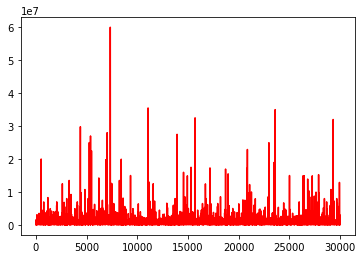

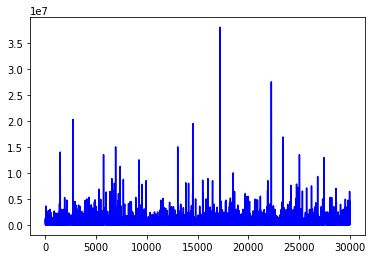

In [103]:

big_states = df.Price[df.State.isin(['CA', 'TX', 'NY'])]
#df.Price[df.State == 'CA'] or df.Price[df.State == 'TX'] or df.Price[df.State == 'NY']
#[df.State == 'TX'][df.State == 'NY']
small_states = df.Price[df.State != 'CA'][df.State != 'TX'][df.State != 'NY']

plt.plot(big_states, color='red')
plt.show()
plt.plot(small_states, color='blue')

plt.show()

In [104]:
df[df.State == 'CA'].count()

Crawl Timestamp               2721
Title                         2721
Description                   2721
Price                         2721
Longitude                     2721
Latitude                      2721
Beds                          2721
Bath                          2721
Features                      2721
Address                       2721
City                          2721
State                         2721
Zipcode                       2721
Address Full                  2721
Facts                         2721
Sqr_Ft                        2721
Lot_Size                      2721
Year_Built                    2721
Price_Sqr_Ft                  2721
Last_Sold_Year                2721
Last_Sold_For                 2721
Last_Tax_Assessment           2721
Last_Tax_Year                 2721
Days_On_Trulia                2721
Beds_isnull                   2721
Bath_isnull                   2721
Sqr_Ft_isnull                 2721
Lot_Size_isnull               2721
Year_Built_isnull   

In [105]:
df[df.State == 'TX'].count()

Crawl Timestamp               4899
Title                         4899
Description                   4899
Price                         4899
Longitude                     4899
Latitude                      4899
Beds                          4899
Bath                          4899
Features                      4899
Address                       4899
City                          4899
State                         4899
Zipcode                       4899
Address Full                  4899
Facts                         4899
Sqr_Ft                        4899
Lot_Size                      4899
Year_Built                    4899
Price_Sqr_Ft                  4899
Last_Sold_Year                4899
Last_Sold_For                 4899
Last_Tax_Assessment           4899
Last_Tax_Year                 4899
Days_On_Trulia                4899
Beds_isnull                   4899
Bath_isnull                   4899
Sqr_Ft_isnull                 4899
Lot_Size_isnull               4899
Year_Built_isnull   

In [106]:
df[df.State == 'NY'].count()

Crawl Timestamp               1194
Title                         1194
Description                   1194
Price                         1194
Longitude                     1194
Latitude                      1194
Beds                          1194
Bath                          1194
Features                      1194
Address                       1194
City                          1194
State                         1194
Zipcode                       1194
Address Full                  1194
Facts                         1194
Sqr_Ft                        1194
Lot_Size                      1194
Year_Built                    1194
Price_Sqr_Ft                  1194
Last_Sold_Year                1194
Last_Sold_For                 1194
Last_Tax_Assessment           1194
Last_Tax_Year                 1194
Days_On_Trulia                1194
Beds_isnull                   1194
Bath_isnull                   1194
Sqr_Ft_isnull                 1194
Lot_Size_isnull               1194
Year_Built_isnull   

In [107]:
len(big_states)

8814

In [108]:
small_states

0         895900.0
4          83500.0
5        1295000.0
6         235288.0
7         129900.0
           ...    
29998     169900.0
30000     409990.0
30001     300000.0
30003     210000.0
30005    4500000.0
Name: Price, Length: 21192, dtype: float64

In [109]:
AB = stats.ttest_ind(big_states, small_states)
print(AB)



Ttest_indResult(statistic=24.33266350950908, pvalue=1.5963853757864895e-129)


In [310]:
df_MV = df.copy() #<-- dataframe thats going to be used for our Multivariate Linear Regression

In [311]:
nlp = spacy.load("en_core_web_lg")

vector_list_titlelg = []

for i, row in df.iterrows():
    doc = nlp(row['Title'])
    vector = doc.vector
    vector_list_titlelg.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Title' + str(x)
    return  x
df_titlelg = pd.DataFrame(vector_list_titlelg, index=df.index)
df_titlelg = df_titlelg.rename(columns=rename_title)
df_titlelg = df_titlelg.replace(np.nan, df_titlelg.median())
df_MV = pd.concat([df_MV, df_titlelg], axis=1)


In [312]:
df_MV

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [313]:
nlp = spacy.load("en_core_web_md")

vector_list_ftmd = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Features'])
    vector = doc.vector
    vector_list_ftmd.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Features' + str(x)
    return  x
df_ftmd = pd.DataFrame(vector_list_ftmd, index=df.index)
df_ftmd = df_ftmd.rename(columns=rename_title)
df_ftmd = df_ftmd.replace(np.nan, df_ftmd.median())
df_MV = pd.concat([df_MV, df_ftmd], axis=1)


In [314]:
df_MV

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [315]:
nlp = spacy.load("en_core_web_md")

vector_listdescmd = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Description'])
    vector = doc.vector
    vector_listdescmd.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Description' + str(x)
    return  x
df_descmd = pd.DataFrame(vector_listdescmd, index=df.index)
df_descmd = df_descmd.rename(columns=rename_title)
df_descmd = df_descmd.replace(np.nan, df_descmd.median())
df_MV = pd.concat([df_MV, df_descmd], axis=1)


In [316]:
df_MV

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [317]:
nlp = spacy.load("en_core_web_lg")

vector_listfactlg = []
# df is your dataset
for i, row in df.iterrows():
    doc = nlp(row['Facts'])
    vector = doc.vector
    vector_listfactlg.append(vector)
def rename_title(x):
    if type(x)is int:
        return 'Facts' + str(x)
    return  x
df_factlg = pd.DataFrame(vector_listfactlg, index=df.index)
df_factlg = df_factlg.rename(columns=rename_title)
df_factlg = df_factlg.replace(np.nan, df_factlg.median())
df_MV = pd.concat([df_MV, df_factlg], axis=1)


In [318]:
backup_df_MV = df_MV.copy() #in case we need to go back, or use for Random Forest Regression. 
df_MV

Crawl Timestamp  \
0      2019-09-19 05:40:24 +0000   
1      2019-09-19 03:48:41 +0000   
2      2019-09-19 09:33:07 +0000   
3      2019-09-22 01:08:10 +0000   
4      2019-10-22 01:06:43 +0000   
...                          ...   
30001  2019-09-19 22:24:52 +0000   
30002  2019-09-21 02:13:07 +0000   
30003  2019-09-19 22:25:11 +0000   
30004  2019-09-02 01:26:09 +0000   
30005  2019-09-19 20:36:09 +0000   

                                                  Title  \
0                      630 W Echo Ln Phoenix, AZ 85021    
1                    2367 Highwood Dr Dallas, TX 75228    
2                     30 Hurlock Ave Buffalo, NY 14211    
3                  6416 Alderton St Flushing, NY 11374    
4       251 NW 177th St #A-123 Miami Gardens, FL 33169    
...                                                 ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131    
30002          2621 Prescott Rd #161 Modesto, CA 95350    
30003           17 Claycut Rd #A Baton Rouge, LA 70806    
30004                  360 Grove St Brooklyn, NY 11237    
30005       1624 Morning Mountain Rd Raleigh, NC 27614    

                                             Description      Price  \
0       NEW CONSTRUCTION in the North Central Corrido...   895900.0   
1       UPDATED EAST DALLAS HOME READY FOR MOVE-IN. H...   247000.0   
2       This single-family home is located at 30 Hurl...    44900.0   
3       Beautiful semi detached, ranch type corner ho...   959000.0   
4       great investor opportunity!!! , beautiful stu...    83500.0   
...                                                  ...        ...   
30001   Perfect for investors!! Currently leased thro...   300000.0   
30002   55 + senior park. 3 bedroom 2 bath. master be...   119000.0   
30003   Vacant land ready to build on steps away from...   210000.0   
30004   Amazing opportunity to own an income producin...   329000.0   
30005   A French-inspired estate, remarkably unique t...  4500000.0   

        Longitude   Latitude      Beds      Bath  \
0     -112.081985  33.560055  4.000000  4.500000   
1      -96.676250  32.829227  3.000000  2.000000   
2      -78.825190  42.913000  3.000000  1.000000   
3      -73.860170  40.722960  3.000000  2.000000   
4      -80.206314  25.937965  2.937523  1.000000   
...           ...        ...       ...       ...   
30001  -80.187720  25.771372  1.000000  1.000000   
30002 -121.031560  37.680702  3.000000  2.000000   
30003  -91.137700  30.440481  2.370874  1.906796   
30004  -73.913930  40.699930  7.000000  3.000000   
30005  -78.603240  35.934372  4.000000  9.000000   

                                                Features  \
0      Single Family Home | $260/sqft | Lot Size: 7,8...   
1      Single Family Home | $140/sqft | Lot Size: 7,8...   
2      Single Family Home | $36/sqft | Lot Size: 3,51...   
3      Single Family Home | $677/sqft | Lot Size: 2,5...   
4      Condo | $190/sqft | $140/monthly HOA | Built i...   
...                                                  ...   
30001  Condo | $409/sqft | $604/monthly HOA | Built i...   
30002  Mobile Manufactured | $69/sqft | Lot Size: 18....   
30003  Lot Land | Lot Size: 8276 sqft | 59 Days on Tr...   
30004  Multi Family | Built in 2007 | 2 Days on Truli...   
30005  Single Family Home | $443/sqft | Lot Size: 5.2...   

                                                Address           City State  \
0                      630 W Echo Ln Phoenix, AZ 85021         Phoenix    AZ   
1                    2367 Highwood Dr Dallas, TX 75228          Dallas    TX   
2                     30 Hurlock Ave Buffalo, NY 14211         Buffalo    NY   
3                  6416 Alderton St Flushing, NY 11374        Flushing    NY   
4       251 NW 177th St #A-123 Miami Gardens, FL 33169   Miami Gardens    FL   
...                                                 ...            ...   ...   
30001      300 S Biscayne Blvd #T-3507 Miami, FL 33131           Miami    FL   
30002          2621 Prescott Rd #161

In [319]:
df_MV_keys = df_MV.keys().drop(['Log_LastT', 'Sqrt_LastT', 'Log_LastS', 'Sqrt_LastS', 'Log_TSLA', 'TSLS', 'Building_Age2', 'Building_Age3', 'Log_YearB', 'Sqrt_YearB', 'Last_Tax_Year', 'Last_Sold_Year', 'Year_Built', 'Crawl Timestamp', 'Title', 'Description', 'Price', 'Features', 'Address', 'Address Full', 'City', 'State', 'Zipcode', 'Price_Sqr_Ft', 'Facts'])
df_MV_keys

Index(['Longitude', 'Latitude', 'Beds', 'Bath', 'Sqr_Ft', 'Lot_Size',
       'Last_Sold_For', 'Last_Tax_Assessment', 'Days_On_Trulia', 'Beds_isnull',
       ...
       'Facts290', 'Facts291', 'Facts292', 'Facts293', 'Facts294', 'Facts295',
       'Facts296', 'Facts297', 'Facts298', 'Facts299'],
      dtype='object', length=1257)

In [320]:
df_MV_keys
target_names = ['Price']
linregMV = LinearRegression()


random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_MV[df_MV_keys], df_MV[target_names], test_size=0.25, random_state=42)
linregMV.fit(X_train, y_train)
pred_priceMV = linregMV.predict(X_test)

print('Test Accuracy Score df_MV', linregMV.score(X_test, y_test))
print('Train Accuracy Score df_MV', linregMV.score(X_train, y_train))

Test Accuracy Score df_MV 0.39200966600014164
Train Accuracy Score df_MV 0.42372770269554977


**Running the same train_test_split and linear regression model with out combined data, does show a sizeable improvement to a Test score of ~0.392 compared to the base accuracy (no text processed) ~0.331, and our prior high of ~0.377, although I had assumed the improvment would be bigger.**

In [438]:
linregMV_co = linregMV.coef_
coefficient = linregMV_co.tolist()
#print(coefficient)

coef7 = []
for f in coefficient:
    for g in f:
        coef7.append(g)
coef_table7 = zip(df_MV_keys, coef7)



In [439]:
coef_def7 = list(coef_table7)

type(coef_def7)

list

In [440]:
type(coef_def7[1])

tuple

In [444]:
for i in range(23): 
    print(coef_def7[i], "USD")

('Longitude', 17443.675541324155) USD
('Latitude', 4257.7222274165115) USD
('Beds', 83847.11644949355) USD
('Bath', 206276.45828727144) USD
('Sqr_Ft', 0.07918556838654922) USD
('Lot_Size', 0.004851974852499552) USD
('Last_Sold_For', 0.13450957271561492) USD
('Last_Tax_Assessment', 0.04036439652554691) USD
('Days_On_Trulia', 167.02455571258906) USD
('Beds_isnull', -160788.4333270082) USD
('Bath_isnull', 215514.52941997402) USD
('Sqr_Ft_isnull', 125331.28957722314) USD
('Lot_Size_isnull', -150401.86871365906) USD
('Year_Built_isnull', 98914.81313798194) USD
('Price_Sqr_Ft_isnull', -73156.74683703904) USD
('Last_Sold_Year_isnull', 10992.957037145985) USD
('Last_Sold_For_isnull', 10992.956452685205) USD
('Last_Tax_Assessment_isnull', -133748.31466293725) USD
('Last_Tax_Year_isnull', 199923.56392344667) USD
('Days_On_Trulia_isnull', -84336.49501524905) USD
('Building_Age', 1912.050645942014) USD
('Time_Since_LS', 506.7645838062599) USD
('Year_Since_LT', -34212.56534329298) USD


***For our next model we will use the Random Forest Regressor. Parameters that will be tuned are N_estimators, Max features, and min_sample_leaf. Min Simple Leaf parameters will be 10, 30, 50 ***

In [321]:
X = df_MV[df_MV_keys].values
y = df_MV['Price'].values

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [408]:
%%time
regressortest500 = RandomForestRegressor(n_estimators=500, random_state=0)
regressortest500.fit(X_train, y_train)
print(regressortest500.score(X_test, y_test))
print(regressortest500.score(X_train, y_train))

0.5564092713819613
0.9246868956894905
Wall time: 4h 29min 8s


In [ ]:
%%time
regressortest1 = RandomForestRegressor(n_estimators=100, random_state=0)
regressortest1.fit(X_train, y_train)
print(regressortest1.score(X_test, y_test))
print(regressortest1.score(X_train, y_train))

In [179]:
#100 trees took about 1 hour. Based on this 300 and 500 trees should take 3 and 5 hours respectively. 

In [323]:
%%time
regressortest2 = RandomForestRegressor(n_estimators=200, random_state=0)
regressortest2.fit(X_train, y_train)
print(regressortest2.score(X_test, y_test))
print(regressortest2.score(X_train, y_train))

0.5551301481605657
0.9210425295097796
Wall time: 1h 51min 51s


In [324]:
%%time
regressortest3 = RandomForestRegressor(n_estimators=300, random_state=0)
regressortest3.fit(X_train, y_train)
print(regressortest3.score(X_test, y_test))
print(regressortest3.score(X_train, y_train))



0.5599830524297134
0.9232791406436703


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

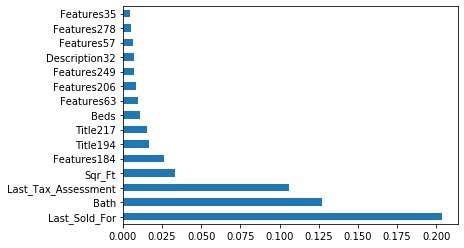

In [333]:
feat_importances = pd.Series(regressortest3.feature_importances_, index=df_MV[df_MV_keys].columns)
feat_importances.nlargest(15).plot(kind='barh')

In [116]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 8h 8min 12s


In [117]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 1", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 1", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 1 [0.5533414020076786, 0.5599830524297134, 0.5564092713819613]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 1 [0.9148242778803671, 0.9232791406436703, 0.9246868956894905]


In [118]:
print('Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=1: 196650.9094235255
Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=1: 672871232964.0823
Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=1: 820287.286847774
 
Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=1: 195886.54155781408
Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=1: 662865883176.8433
Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=1: 814165.7590299676
 
Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=1: 196196.3003998667
Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=1: 668249624743.1166
Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=1: 817465.3660817177


In [121]:
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, random_state=0, min_samples_leaf=10)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

In [122]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 10", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 10", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 10 [0.5466127695304499, 0.5494657842104027, 0.5538108562892095]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 10 [0.656269193008759, 0.6613362702030608, 0.6609086941248672]


In [123]:
print('Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=10: 192091.41510185326
Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=10: 683007617333.4095
Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=10: 826442.748975033
 
Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=10: 192005.3705286581
Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=10: 678709678115.4177
Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=10: 823838.381064768
 
Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=10: 191307.56035927255
Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=10: 672164021051.7765
Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=10: 819856.0977706859


In [120]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, random_state=0, min_samples_leaf=30)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 4h 40min 53s


In [121]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 30", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 30", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 30 [0.48999046970375015, 0.4916963358063168, 0.4911163620680088]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 30 [0.5256954540825525, 0.5275536822445686, 0.5279452672813774]


In [122]:
print('Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=30: 202603.24194790717
Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=30: 768306583633.1882
Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=30: 876530.9941087014
 
Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=30: 202130.05138927096
Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=30: 765736772522.7228
Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=30: 875063.8676820811
 
Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=30: 201905.8434026494
Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=30: 766610477061.5723
Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=30: 875562.9486573609


In [128]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, random_state=0, min_samples_leaf=50)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 4h 17min 40s


In [129]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 50", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 50", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Auto, Min Sample Leaf = 50 [0.44957947589279246, 0.4508015015550344, 0.44943313866548595]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Auto, Min Sample Leaf = 50 [0.46461037661277943, 0.466480629405127, 0.4670751695679349]


In [130]:
print('Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Auto, min_sample_leaf=50: 212387.87172037194
Mean Squared Error 100 Trees with Max Features = Auto, min_sample_leaf=50: 829183941313.3163
Root Mean Squared Error 100 Tree with Max Features = Auto, min_sample_leaf=50: 910595.3773841136
 
Mean Absolute Error 300 Trees with Max Features = Auto, min_sample_leaf=50: 212150.72287335407
Mean Squared Error 300 Trees with Max Features = Auto, min_sample_leaf=50: 827343014220.9855
Root Mean Squared Error 300 Tree with Max Features = Auto, min_sample_leaf=50: 909583.9786523207
 
Mean Absolute Error 500 Trees with Max Features = Auto, min_sample_leaf=50: 212136.0617795514
Mean Squared Error 500 Trees with Max Features = Auto, min_sample_leaf=50: 829404391811.7704
Root Mean Squared Error 500 Tree with Max Features = Auto, min_sample_leaf=50: 910716.4167905234


In [225]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='sqrt', random_state=0)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 11min 22s


In [226]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 1", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 1", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 1 [0.37918041916723977, 0.39792149807838617, 0.40109110131535797]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 1 [0.9024146678941869, 0.9108885654988432, 0.9134366734965818]


In [227]:
print('Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=1: 255472.71748750415
Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=1: 935236976699.5182
Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=1: 967076.5102614778
 
Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=1: 251927.49641230702
Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=1: 907004378176.3905
Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=1: 952367.7746419135
 
Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=1: 250314.00557847385
Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=1: 902229512434.0662
Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=1: 949857.6274548024


In [230]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='sqrt', random_state=0, min_samples_leaf=10)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))


Wall time: 7min 55s


In [231]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 10", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 10", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 10 [0.36204238060143323, 0.3646209511639059, 0.36455663097133884]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 10 [0.5045298256262005, 0.5048536832777947, 0.5046359911288926]


In [232]:
print('Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=10: 251629.97066993298
Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=10: 961054666523.9027
Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=10: 980333.9566310567
 
Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=10: 249443.57060660422
Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=10: 957170165113.9786
Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=10: 978350.7372685823
 
Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=10: 248994.61324223405
Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=10: 957267060611.9531
Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=10: 978400.2558319132


[749000. 165000.  89900. ... 229000. 769000. 239990.]


*The last two models ran extremely fast in comparison to our earlier Random Forest models with no parameter tuning, and minimal tuning. Checking earlier splits it doesn't seem like there are any issues with them. Will confirm with the last model below*

In [249]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='sqrt', random_state=0, min_samples_leaf=30)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))


Wall time: 6min 34s


In [250]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 30", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 30", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 30 [0.31596277302716025, 0.3111367446726244, 0.3081500313817176]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 30 [0.37430429835756157, 0.3737542022822041, 0.3731974148742547]


In [251]:
print('Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=30: 259922.10636591565
Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=30: 1030471537714.4918
Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=30: 1015121.4398851459
 
Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=30: 260212.01932482971
Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=30: 1037741733931.093
Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=30: 1018696.0949817629
 
Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=30: 260756.2935723063
Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=30: 1042241084136.3638
Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=30: 1020902.093315693


In [253]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='sqrt', random_state=0, min_samples_leaf=50)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 6min


In [254]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 50", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 50", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = Sqrt, Min Sample Leaf = 50 [0.282678303692238, 0.2813234350761954, 0.279906725474488]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = Sqrt, Min Sample Leaf = 50 [0.3271365321418487, 0.32327382619285394, 0.3232123708261486]


In [255]:
print('Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = Sqrt, min_sample_leaf=50: 269034.6399450085
Mean Squared Error 100 Trees with Max Features = Sqrt, min_sample_leaf=50: 1080613104496.3973
Root Mean Squared Error 100 Tree with Max Features = Sqrt, min_sample_leaf=50: 1039525.4227273123
 
Mean Absolute Error 300 Trees with Max Features = Sqrt, min_sample_leaf=50: 269205.1492490225
Mean Squared Error 300 Trees with Max Features = Sqrt, min_sample_leaf=50: 1082654153566.7136
Root Mean Squared Error 300 Tree with Max Features = Sqrt, min_sample_leaf=50: 1040506.6811735106
 
Mean Absolute Error 500 Trees with Max Features = Sqrt, min_sample_leaf=50: 268758.5463429849
Mean Squared Error 500 Trees with Max Features = Sqrt, min_sample_leaf=50: 1084788363320.5115
Root Mean Squared Error 500 Tree with Max Features = Sqrt, min_sample_leaf=50: 1041531.7389885492


In [256]:
print("-----")

-----


In [257]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='log2', random_state=0)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 3min 17s


In [258]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 1", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 1", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 1 [0.30081444872744034, 0.30039654540302974, 0.2998665496249959]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 1 [0.8904151184588551, 0.8996683755974423, 0.9017746760869172]


In [259]:
print('Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf = 1:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf = 1:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf = 1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=1:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=1:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=1:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf = 1: 298787.57286071306
Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf = 1: 1053291811844.9083
Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf = 1: 1026300.0593612515
 
Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=1: 294999.9430545374
Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=1: 1053921364542.2479
Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=1: 1026606.7234059243
 
Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=1: 294323.3899576808
Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=1: 1054719779515.6399
Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=1: 1026995.5109520392


In [260]:
%%time
est = [100, 300, 500]
y_pred_mse10 = []
reg_score_test_mse10 = []
reg_score_train_mse10 = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='log2', random_state=0, min_samples_leaf=10)
    regressor.fit(X_train, y_train)
    y_pred_mse10.append(regressor.predict(X_test))
    reg_score_test_mse10.append(regressor.score(X_test, y_test))
    reg_score_train_mse10.append(regressor.score(X_train, y_train))

Wall time: 2min 21s


In [261]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 10", reg_score_test_mse10)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 10", reg_score_train_mse10)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 10 [0.26404725831519404, 0.2599141192212009, 0.26099404290662953]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 10 [0.41965290497369045, 0.42045252584938125, 0.4210984169570412]


In [262]:
print('Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse10[0]))
print('Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse10[0]))
print('Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse10[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse10[1]))
print('Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse10[1]))
print('Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse10[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=10:', metrics.mean_absolute_error(y_test, y_pred_mse10[2]))
print('Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=10:', metrics.mean_squared_error(y_test, y_pred_mse10[2]))
print('Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=10:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse10[2])))

Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf=10: 291028.63681994926
Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf=10: 1108679942413.7925
Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf=10: 1052938.7173115977
 
Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=10: 291744.30387295934
Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=10: 1114906331899.381
Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=10: 1055891.250034482
 
Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=10: 291344.5462291558
Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=10: 1113279475089.7559
Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=10: 1055120.597415175


In [265]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='log2', random_state=0, min_samples_leaf=30)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 1min 55s


In [266]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 30", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 30", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 30 [0.22587169023402687, 0.22316823400325447, 0.21952842573867049]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 30 [0.2961426885598246, 0.29448653345568954, 0.2933548523598929]


In [267]:
print('Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=30:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=30:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=30:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf=30: 303611.3057231132
Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf=30: 1166189731051.782
Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf=30: 1079902.6488771022
 
Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=30: 302558.36451827845
Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=30: 1170262367144.4058
Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=30: 1081786.6550962836
 
Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=30: 303076.8265975034
Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=30: 1175745575764.484
Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=30: 1084318.0233513063


In [268]:
%%time
est = [100, 300, 500]
y_pred_mse = []
reg_score_test_mse = []
reg_score_train_mse = []
for z_mse in est:
    regressor = RandomForestRegressor(n_estimators=z_mse, max_features='log2', random_state=0, min_samples_leaf=50)
    regressor.fit(X_train, y_train)
    y_pred_mse.append(regressor.predict(X_test))
    reg_score_test_mse.append(regressor.score(X_test, y_test))
    reg_score_train_mse.append(regressor.score(X_train, y_train))

Wall time: 1min 44s


In [269]:
print("Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 50", reg_score_test_mse)
print("Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 50", reg_score_train_mse)

Accuracy Score for 100, 300 and 500 Trees on Test Set with Max Features = log2, Min Sample Leaf = 50 [0.20445924895214906, 0.19870461915551652, 0.19745188905569]
Accuracy Score for 100, 300 and 500 Trees on Train Se with Max Features = log2, Min Sample Leaf = 50 [0.2510577828165532, 0.24784624259388702, 0.24746386248295757]


In [270]:
print('Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[0]))
print('Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[0]))
print('Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[0])))

print(" ")

print('Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[1]))
print('Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[1]))
print('Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[1])))

print(" ")

print('Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=50:', metrics.mean_absolute_error(y_test, y_pred_mse[2]))
print('Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=50:', metrics.mean_squared_error(y_test, y_pred_mse[2]))
print('Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=50:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mse[2])))

Mean Absolute Error 100 Trees with Max Features = log2, min_sample_leaf=50: 310748.2617629941
Mean Squared Error 100 Trees with Max Features = log2, min_sample_leaf=50: 1198446617700.4878
Root Mean Squared Error 100 Tree with Max Features = log2, min_sample_leaf=50: 1094735.8666365545
 
Mean Absolute Error 300 Trees with Max Features = log2, min_sample_leaf=50: 311793.9649610886
Mean Squared Error 300 Trees with Max Features = log2, min_sample_leaf=50: 1207115710524.2166
Root Mean Squared Error 300 Tree with Max Features = log2, min_sample_leaf=50: 1098688.1771113297
 
Mean Absolute Error 500 Trees with Max Features = log2, min_sample_leaf=50: 311222.2405566726
Mean Squared Error 500 Trees with Max Features = log2, min_sample_leaf=50: 1209002892480.7048
Root Mean Squared Error 500 Tree with Max Features = log2, min_sample_leaf=50: 1099546.6758990746


In [162]:
Table2 = pd.read_csv('c:\\Users\Jun\Documents\Capstone 2 Numbers noted V2.csv')

In [163]:
Table2 = Table2.replace(np.nan, '')

Table2 = Table2.style.set_caption('Random Forest Hyperparameter Tuning')


**Hyperparameter Tuning Table**

In [164]:
Table2

**Conclusion

**After completing our analysis, I can conclude that this dataset was able to produce a very respectacle R2 score ( 0.4917 on the test set and 0.5276 on the training set), but is not ideal for this purpose. By using the .coef_ and .feature_importance_ features on the Linear Regression and Random Forest Regression models I was able to find some very interesting insights comparing our variables to the target variable Price.** 

**Looking at the graph below, you can see that for our Random Forest Regression, the variables Last_Sold_For, Bath, Last_Tax_Assesment and Sqr_Ft, had a big hand in predicting the target variable price. So when deciding to buy or sell a home, homeowners and buyers want to emphasize these variables in their decisions.** 



**Reviewing the information for the .coef_ variable, there is a wealth of valuable information. Looking at some of the variables I mentioned above, we can see that the Bath variable had a .coef_ of 206,276.46 USD, meaning that for every bathroom a listing has, you can expect an 206,276.46 USD increase in cost for that home.** 

**For the Sqr_Ft variable, you can see that for every square foot of the unit there is an increase of 0.08 USD. So generally the bigger the unit the more expensive it will be.** 

**While I was performing EDA on the dataset I came across some very interesting insights. By plotting the States variable by the average price of each individual state, you can see that the most expensive homes reside in the states California, Massachusetts, New York, Washington state, and Washington DC. This was a bit surprising, because during our statistical analysis we found that the three states with the highest GDP were Texas, New York, and California so naturally it was assumed that they would have the higher prices.**



**However, the most interesting insights that I found are in the graph below where I plotted the States by the Building Age, and mapped it with the Price variable. When you look at the individual states, you will find that for some states like North Carolina, Louisiana and Pennsylvania will have their home values on a linear pattern, with the older homes retaining a higher value than newer ones. Whereas, for other states like California, New York, and Florida, regardless of when the home was built, it will have virtually no effect on the price of the listing. It could be a newly built home, or one hundreds of years old, there is simply no correlation between the Price and Building Age**
